<a href="https://colab.research.google.com/github/Sharon-Rebecca-Kulundu/Classification-of-Water-Wells-in-TanzaniaPhase-3-project/blob/main/Classification_of_water_wells_in_Tanzania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of water wells in Tanzania

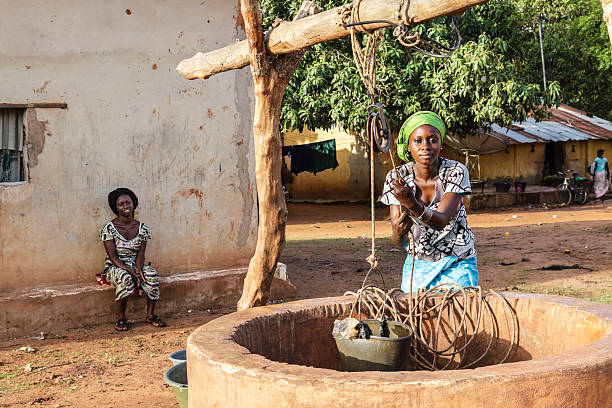

## Introduction

Access to clean water is a fundamental human need and a major challenge for many developing countries, including Tanzania. With a population of over 57 million, providing clean water to all citizens is a critical task. There are many water points already established in Tanzania, but some are in dire need of repair while others have completely failed. In order to address this challenge, we aim to build a classifier to predict the condition of water wells based on information such as the type of pump used and the installation date. This tool will be instrumental in helping NGOs locate wells that need repair and the government of Tanzania to identify patterns in non-functional wells, which can inform the construction of new wells. This is a ternary classification problem, but can be designed to be binary. With this project, we hope to improve access to clean water for the people of Tanzania and help address this critical need.

## Business Understanding
Tanzania struggles to provide clean water to its population due to the failure or in need of repair of some of its existing water wells.There is a need to improve access to clean water in Tanzania. With a population of over 57 million, it is important to ensure that as many water wells as possible are functional and providing clean water to those who need it. The lack of access to clean water not only affects the health and well-being of the population, but also hinders the economic and social development of the country.. By building a classifier that can predict the condition of a water well, organizations such as NGOs and the government can more efficiently identify and repair non-functional wells and make informed decisions about the construction of new wells.The benefits of this project include improved water accessibility for the population of Tanzania, better management of existing wells, and data-driven decision-making for the government.

## Main Objectives
To build a classifier that can predict the condition of water wells based on information about the class the waterpoints belong to: functional, functional but need some repairs, and non-functional.

## Specific Objectives
1. Conducting a thorough exploratory data analysis of the dataset to understand the relationships between each feature and the labels.
2.	To develop a classifier that accurately predicts the condition of water wells, using the collected data.
3.	To evaluate the performance of the classifier and make improvements as necessary.
4.  To measure the impact of the classifier on the access to clean water in Tanzania, and to make improvements as necessary to ensure ongoing success.


## Data Understanding

The data for this analysis was sourced from [Taarifa](http://taarifa.org/) and the [Tanzanian Ministry of Water](http://maji.go.tz/) and was originally made available as part of a competition hosted by [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/). It encompasses roughly 60,000 instances. The data set is comprised of three parts: training set values, training set labels, and test set values. The training set contains 59,400 observations with 41 variables. Below are the Column Names and Description of the  waterpoints dataset:

* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private -
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint


## Importing libraries and datasets

In [1]:
import pandas as pd #for data manipulation and analysis
import numpy as np #for performing quick operations on numerical data
import matplotlib.pyplot as plt # to form plots
import seaborn as sns #for data visualization
import folium # to visualize maps
import folium.plugins as plugins
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
import joblib
from sklearn.metrics import plot_confusion_matrix
import geopandas
from pylab import rcParams

# to view matplotlib plots in the jupyter notebooks
%matplotlib inline



import warnings
warnings.filterwarnings('ignore')


In [2]:
df_features = pd.read_csv('/content/drive/MyDrive/Tanzania water wells/trainingsetvalues.csv', parse_dates=['date_recorded'])
df_labels = pd.read_csv('/content/drive/MyDrive/Tanzania water wells/Trainingsetlabels.csv')

In [3]:
# Previewing features data
df_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
# Previewing labels data
df_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# combine the features and labels into a single dataframe
data = pd.concat([df_features, df_labels.status_group], axis=1)
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Data Exploration / Feature Selection

### Check for missing data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     59400 non-null  int64         
 1   amount_tsh             59400 non-null  float64       
 2   date_recorded          59400 non-null  datetime64[ns]
 3   funder                 55765 non-null  object        
 4   gps_height             59400 non-null  int64         
 5   installer              55745 non-null  object        
 6   longitude              59400 non-null  float64       
 7   latitude               59400 non-null  float64       
 8   wpt_name               59400 non-null  object        
 9   num_private            59400 non-null  int64         
 10  basin                  59400 non-null  object        
 11  subvillage             59029 non-null  object        
 12  region                 59400 non-null  object        
 13  r

In [7]:
#Check for the number of missing values per feature
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

The initial analysis of the data reveals that there are seven features with missing values. A more in-depth examination will be required to determine the best way to deal with these missing values and any placeholder values that may be found.

There is a significant amount of missing data present. It will be necessary to perform a more in-depth analysis of each feature to determine the best approach for handling the missing values. This could involve imputing the data, but it's important to determine the best method for doing so. Alternatively, the missing data could be dropped, but this decision should also be based on further investigation.

### Detailed inspection of each feature

### id

The index is not a factor that is taken into account during the analysis. It will be dropped

### amount_tsh

This is the Total Static Head (TSH). It refers to the total vertical height that a liquid must be lifted in a pumping system, from the source to the discharge point. It is a measure of the pressure required to move the liquid and is expressed in units of length such as feet or meters. The TSH is an important factor in determining the size and performance of a pumping system, as it affects the energy required to pump the liquid and the flow rate that can be achieved.

In [8]:
#  creating a new DataFrame that only contains the rows where the "amount_tsh" value is 0.
df_tsh_zero = data[data['amount_tsh'] == 0]

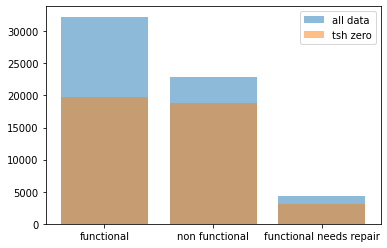

In [9]:
#comparing the distribution of the "status_group" values between the "data" and "df_tsh_zero" DataFrames
plt.bar(data.status_group.unique(), data.status_group.value_counts(), alpha=0.5, label='all data')
plt.bar(df_tsh_zero.status_group.unique(), df_tsh_zero.status_group.value_counts(), alpha=0.5, label='tsh zero')
plt.legend();

From the above visualizations,many of the non-functional and functional but needing repair water pumps lack a defined amount_tsh. The majority of functional pumps also lack this value. Approximately 70% of all water pumps do not have an amount_tsh defined.

The distribution of water pumps without an amount_tsh set to 0 is widespread, while those with a value are less common but overlap with the first group.

Because 70% of the water pumps do not have this value defined, it is likely that it cannot be accurately estimated and must be removed from the data.

### date_recorded

This describes when the the information was documented.

How many data points are older than the core of the dataset?

In [10]:
#Checking if the 'date_recorded' is less than the date represented by the Pandas 
#Timestamp object created with year 2011, month 1, and day 1
df_data = data[data['date_recorded'] < pd.Timestamp(2011, 1, 1)]
len(df_data)


31

The 31 cases prior to the year 2011 appear outdated. The majority of the data falls within the years 2011 and 2013, whereas these cases are from the years 2002 to 2004. 
It is possible that they may be errors or outdated information
It might be advantageous to separate the data into two groups based on whether the last recording was made during a rainy or dry season.

### funder
Who funded the well

In [11]:
#counting the number of occurrences of each unique value in the "funder" column
data.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64

The data related to the funder of a well project has 1898 unique entries and is missing information for 3635 entries. Additionally, 777 entries have a value of 0. To make it easier to analyze, the missing and 0 entries will be replaced with the label "unknown". The challenge will be to effectively use this information in a manner that reduces dimensionality and computational burden. The impact of the funder on the well project quality will need to be considered when determining the best approach.

### gps_height
* This describes altitude of the well.


In [12]:
# checking unique values
data['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

* An analysis of the data columns revealed some negative values in the "gps_height" column. To determine the number of instances and their location, further investigation is needed.

In [13]:
# counting the number of instances in the "data" where the value in the "gps_height" column is less than 0
len(data[data.gps_height < 0])

1496

A total of 1496 instances in the data have a negative altitude, but the lowest altitude that can be recorded in Tanzania is 0. This implies that these negative altitude values may be errors or missing information.
It's noteworthy that all the data points with negative altitudes are located near the coast(From google maps). Although GPS readings can have an error margin of up to 20 meters and the height measurements may not represent the actual height, they are still accurate in relation to the other GPS height readings and the ellipsoid used for reference. As a result, these values will not be altered.

There are more than 20,000 gps_height values recorded as zero , which represents approximately 34% of the data. 

The concentrations of values that are equal to zero are relatively grouped together, with some of them located near the coast, which suggests that they may actually be accurate measurements and not just default values.

I intend to research the elevation of major cities where the concentrations of zero values are found by using Google. The elevation of the following cities was determined: Dodoma at 1,100 meters, Mbeya at 1,700 meters, Tabora at 1,200 meters, Shinyanga at 1,135 meters, and Bukoa at 1,200 meters.

In [14]:
def print_data_range(data):
    """Print the min, max, mean and median of a series"""
    print(f"min {data.min()}")
    print(f"max {data.max()}")
    print(f"mean {data.mean()}")
    print(f"median {data.median()}")

In [15]:
#Checking for the min, max and mean gps_height of the Shinyanga region as it has the biggest count of zero values.
print_data_range(data[(data.region == 'Shinyanga') & (data.gps_height != 0)]['gps_height'])

min 1297
max 1434
mean 1350.9817073170732
median 1350.5


The elevation found for Shinyaga is close to the value of 1350, but all the elevations calculated in the data are higher than what was found through a quick Google search.
To ensure consistency in the data, the values of the gps_height column equal to zero will be filled in by using the average of the recorded values for each region. The average will be calculated and then used as the imputed value for any gps_height values equal to zero.

### installer
Organization that installed the well.

In [16]:
# checking unique values
data['installer'].value_counts()

DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: installer, Length: 2145, dtype: int64

According to the data above,installer has a large number of unique values, some missing values represented by NaN, and some with a value of 0 which may be a placeholder.

I will change the zero and missing values in the data to "unknown" and convert all text values to lowercase. Instead of changing the missing values to the most frequent value (mode), which is "DWE", keeping it as "unknown" may be a better option considering the different variations in the name

### Longitude and latitude


In [17]:
# checking unique values
data['longitude'].value_counts()

0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: longitude, Length: 57516, dtype: int64

In [18]:
# checking unique values
data['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-6.980220e+00       2
-2.476680e+00       2
-6.978263e+00       2
                 ... 
-3.287619e+00       1
-8.234989e+00       1
-3.268579e+00       1
-1.146053e+01       1
-6.747464e+00       1
Name: latitude, Length: 57517, dtype: int64

From the analysis, it was observed that out of all the instances, 3% (1812) of the longitude values are 0. It was also noticed that there were no instances where latitude was 0, but some instances had a latitude value of -2e-08 which falls outside the boundaries of Tanzania.

In [19]:
#Checking the extent of the longitude values in Shinyanga regions
print_data_range(data[(data['region'] == 'Shinyanga') & (data['longitude'] != 0)]['longitude'])

min 31.45472581
max 34.75873373
mean 33.24012071028917
median 33.43722348


In [20]:
#Checking the extent of the longitude values in Mwanza regions
print_data_range(data[(data['region'] == 'Mwanza') & (data['longitude'] != 0)]['longitude'])

min 32.04645808
max 33.75689474
mean 33.09156419778649
median 33.0818363


In [21]:
# selecting only the rows from the data  where the value of the "latitude" column is greater than -3 x 10^(-8)
data[data['latitude'] > -3e-08].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair


From the above analysis,the average values for longitude and latitude in the region should be calculated and used to fill in any missing latitude and longitude data.

### wpt_name
Name of the waterpoint if there is one.

In [22]:
# checking unique values
data['wpt_name'].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

This characteristic has a large number of unique values(very high cardinality), 37,400 to be exact. Since the name of the waterpoint does not appear to affect its operation, I will drop this feature from the data

### num_private
Almost all of the waterpoints, close to 99%, are recorded as having no private users. It is possible that this information is unknown or that there truly are no private users. The term "private users" may refer to business users in this context.

In [23]:
#Checking for the maximum value in the "num_private" column of the "data" 
data['num_private'].max()

1776

In [24]:
#Checking what the "population" values are around the water point with the highest "num_private" users value
data[data['num_private'] == data['num_private'].max()]['population']

24657    20
Name: population, dtype: int64

From the above analysis,this water source is presumed  that 1776 individuals from these establishments, as well as possibly 20 members of the general public, utilize this water source.
Determining the difference between unknown num_private values that equal 0 and instances where there are truly no private users would require a significant amount of effort.

Therefore, I have decided to leave this aspect of the feature unchanged.

### basin
This is the Geographic water basin.

In [25]:
# checking unique values
data['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

There are 7 geographical attributes.

However, I have decided to drop this feature because it duplicates the information contained in the region/lga/ward/subvillage location structure.

### subvillage
This is a description of the geographical location. The management of the wards is done by dividing them further: into streets for urban wards and into villages for rural wards.

In [26]:
# checking unique values
data['subvillage'].value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

There are more than 19,000 sub-villages recorded, but 371 of these sub-villages have missing data.

The name "Madukani" is very common village/street name and may not be significant in a model without incorporating other regional characteristics.

There are 159 unique combinations of region, lga, and ward that include the location Madukani.

The "subvillage" column  from the analysis above has high cardinality and is useful in identifying specific locations. However, the data shows that there are clusters of missing values in two areas. Since obtaining the actual values, if they exist, would be a significant time investment, and filling in these missing values with other estimates wouldn't provide any meaningful information or benefit to the model, these missing values will be labeled as "unknown".

### region
This is the Geographic location.
Tanzania is separated into 31 different regions.

In [27]:
# checking unique values
data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

The data for this feature was collected prior to the creation of 5 additional regions in Tanzania, and some regions may not be present in the data due to limited data collection. Despite these limitations, this feature will remain unchanged as it currently stands

### region_code
This represents Geographic location (coded)

In [28]:
# checking unique values
data['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

The codes in the "region_code" column do not match the names of the regions, making it unclear what they refer to. As a result, they will be dropped from the data.

### district_code
This also represents Geographic location (coded)

In [29]:
# checking unique values
data['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

The "district_code" column contains codes that represent the districts within each region. However, these codes are not unique across the entire country, only within the region. Additionally, they are nominal in nature and converting them to ordinal codes may cause confusion for a model. Therefore, this feature will be dropped and the district names will be used instead.

### lga
The "District Names" feature refers to a sub-division within each region.

In [30]:
# checking unique values
data['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

The names in the "lga" column match the district codes, making it a useful feature. Since it is nominal in nature and the non-unique codes could potentially cause confusion for a model, this feature will be used.

### ward
This is a sub-division located within each district

In [31]:
# checking unique values
data['ward'].value_counts()

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64

From the analysis above, it has been noted that the "ward" feature has a high cardinality. As a result, let's examine the "ward" feature specifically for the Arusha region, in the Arusha Rural Local Government Area.

There are 20 distinct "wards" in the specified location of Arusha region, Arusha Rural Local Government Area. As a result, the "ward" feature will be retained as it is, without any modifications

### population
This is the population around the well.


From the analysis above, it appears that roughly 36% of the population data is set to 0.

The instances appear to have little overlap, resulting from consistent collection or non-collection by the data collectors.

In [32]:
# Evaluating the extent of populated areas with non-zero values.
print_data_range(data[data['population'] != 0]['population'])

min 1
max 30500
mean 281.08716694284436
median 150.0


Some regions have missing population values, while others have no population values at all.

In [33]:
#Evaluating the average population for each region in the original dataframe where the population is not equal to zero.
data[data['population'] != 0].groupby(['region'])['population'].mean()

region
Arusha           262.317408
Dar es Salaam    240.843478
Iringa           120.883051
Kigoma           505.810054
Kilimanjaro      105.747888
Lindi            364.404916
Manyara          317.778269
Mara             538.794312
Morogoro         264.625562
Mtwara           267.441618
Mwanza           552.070845
Pwani            349.618831
Rukwa            375.558773
Ruvuma           241.790612
Shinyanga        428.359756
Singida          279.389287
Tanga            246.753828
Name: population, dtype: float64

In [34]:
# Evaluating the median population for each region in the original dataframe where the population is not equal to zero.
data[data['population'] != 0].groupby(['region'])['population'].median()

region
Arusha           150.0
Dar es Salaam    150.0
Iringa            54.0
Kigoma           360.0
Kilimanjaro       40.0
Lindi            300.0
Manyara          213.0
Mara             300.0
Morogoro         200.0
Mtwara           123.0
Mwanza           400.0
Pwani             50.0
Rukwa            200.0
Ruvuma           100.0
Shinyanga        500.0
Singida          200.0
Tanga             80.0
Name: population, dtype: float64

In [35]:
#Evaluating the value representing the median population for all the regions in the original dataframe 
# where the population is not equal to zero.
data[data['population'] != 0]['population'].median()

150.0

In [36]:
# Checking for the region with the highest population
data[data['population'] == data['population'].max()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
30537,12169,0.0,2011-03-12,Government Of Tanzania,184,DWE,38.783756,-5.181904,Mkwajuni,0,...,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


The highest population value data point is located in Uhuru Village and its accuracy is unknown. To preserve the information, the missing values will be filled in with imputed data. The median will be used for imputation instead of the mean due to the skewed nature of the data. For regions with some population data, the median of that region will be used for imputation. For regions without any population data, the median of all the population data will be used.

### public_meeting
This is represented by either True or False

In [37]:
#Computing the frequency of each unique value in the "public_meeting" column.
data['public_meeting'].value_counts(dropna=False, normalize=True)

True     0.858771
False    0.085101
NaN      0.056128
Name: public_meeting, dtype: float64

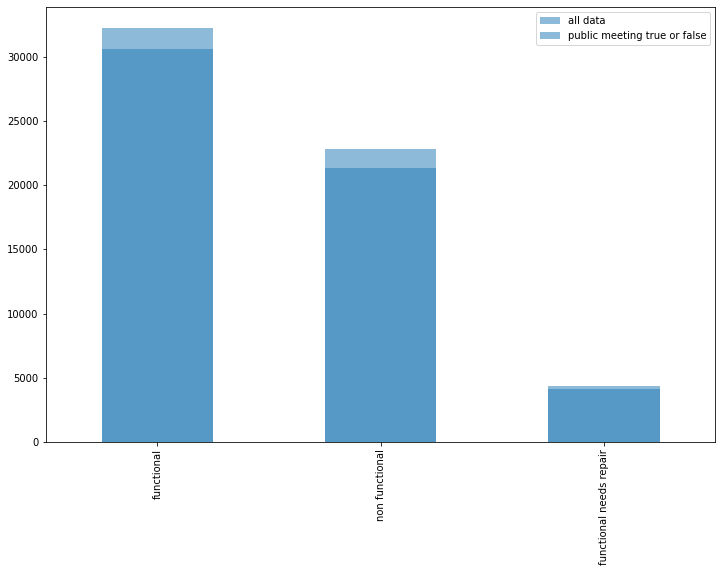

In [38]:
#creating a bar plot visualization to compare the frequency of different values in the "status_group" column of a data, 
# before and after filtering out the rows with missing values in the public_meeting column
plt.figure(figsize=(12,8))
data.status_group.value_counts().plot(alpha=0.5, label='all data', kind='bar')
data[~data['public_meeting'].isna()].status_group.value_counts().plot(alpha=0.5, 
                                                                      label='public meeting true or false',
                                                                      kind='bar') 
plt.legend()
plt.show()

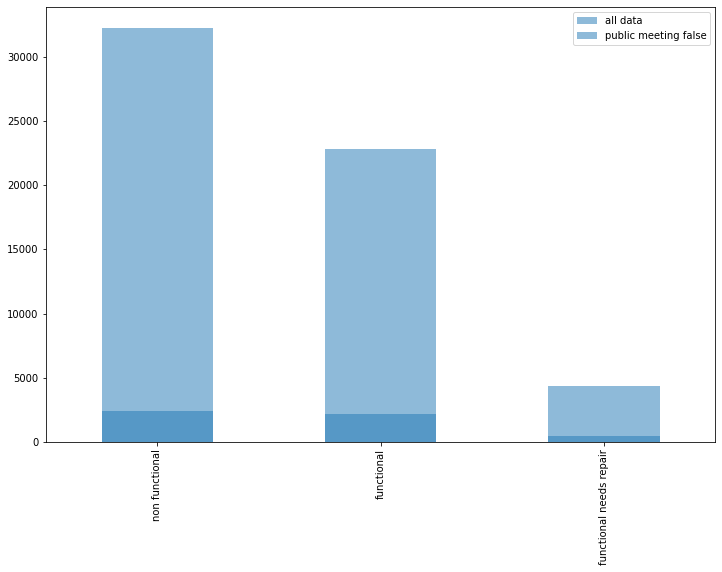

In [39]:
# creating a bar plot visualization to compare the frequency of different values in the "status_group" column of a dataframe, 
# before and after filtering out the rows where the "public_meeting" column is False
plt.figure(figsize=(12,8))
data.status_group.value_counts().plot(alpha=0.5, label='all data', kind='bar')
data[data['public_meeting'] == False].status_group.value_counts().plot(alpha=0.5, 
                                                                      label='public meeting false',
                                                                      kind='bar') 
plt.legend()
plt.show()

The missing values in the "public_meeting" feature are distributed throughout the country, but there is a low number of missing values for functional needs repair waterpumps.
Since the majority (85%) of the "public_meeting" values are True, and the False and missing values are evenly distributed, I will fill in the missing values with "True."

### recorded_by
Group entering this row of data

This feature has a uniform value, so it will be dropped.

### scheme_name
Who operates the waterpoint

In [40]:
# checking unique values
data['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

Approximately 50% of the values in this feature are missing, and it appears to represent the name of the water point operator or the type of water point. Since the missing values cannot be accurately filled in and it is unlikely that it affects the functionality of the water pump, it will be dropped from the data.

### permit
If the waterpoint is permitted

In [41]:
# counting the frequency of each unique value in the "permit" column of the data, 
# and normalizing the count to represent the proportion of the total data
data['permit'].value_counts(normalize=True, dropna=False)

True     0.654074
False    0.294478
NaN      0.051448
Name: permit, dtype: float64

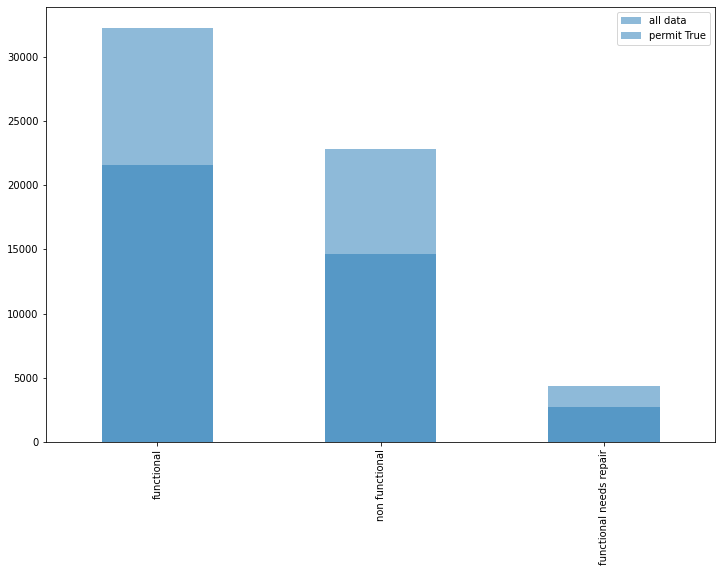

In [42]:
# creating a bar plot to compare the distribution of the "status_group" variable between all data and data 
# where the "permit" value is True
plt.figure(figsize=(12,8))
data.status_group.value_counts().plot(alpha=0.5, label='all data', kind='bar')
data[data['permit'] == True].status_group.value_counts().plot(alpha=0.5, 
                                                                      label='permit True',
                                                                      kind='bar') 
plt.legend()
plt.show()

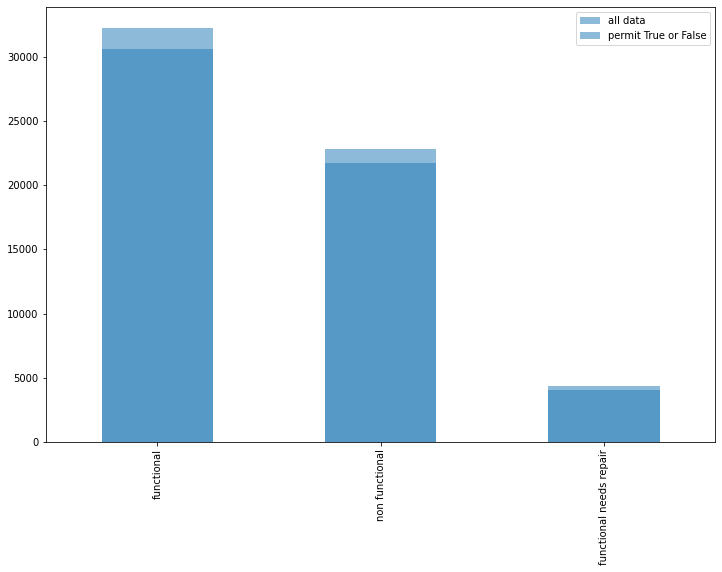

In [43]:
#  generating a bar plot to compare the distribution of the "status_group" feature between the entire dataset and the subset of the dataset 
# where the "permit" feature is either True or False (not NaN)
plt.figure(figsize=(12,8))
data.status_group.value_counts().plot(alpha=0.5, label='all data', kind='bar')
data[~data['permit'].isna()].status_group.value_counts().plot(alpha=0.5, 
                                                                      label='permit True or False',
                                                                      kind='bar') 
plt.legend()
plt.show()

From the analysis above,I will fill in the missing values with the most common value (True).

### construction_year
This is year the waterpoint was constructed

Approximately 35% of the data has the value of zero, what does the distribution look like for the rest of the data?

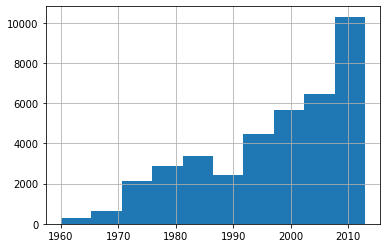

In [44]:
# plotting the histogram of the "construction_year" column for all rows where 
# the value of "construction_year" is not equal to zero
data[data['construction_year'] != 0]['construction_year'].hist()

In [45]:
# evaluating the range of the construction year values from the data where the construction year is not equal to 0
print_data_range(data[data['construction_year'] != 0]['construction_year'])

min 1960
max 2013
mean 1996.8146855857951
median 2000.0


From the above analysis,the waterpoints with no recorded construction year are dispersed throughout the country, and there are areas where such information was not gathered. To compensate for the skewed nature of the data, the median value of the entire dataset will be used for imputation. Specifically, waterpoints in regions with available data will receive the median value of that region, while those in regions without data will be given the national median value.

### Extraction Types : extraction_type, extraction_type_group, extraction_type_class
They represent the kind of extraction the waterpoint uses

What is the comparison between the three features of extraction_type?

In [46]:
# checking unique values
data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [47]:
# checking unique values
data['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [48]:
# checking unique values
data['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

The features "extraction_type_class", "extraction_type_group", and "extraction_type" have a gradual increase in specificity, with "extraction_type" being the most detailed. I will eliminate the more general features since the most specific feature, "extraction_type", has 18 unique categories and there is no redundancy.

### Management features: management, management_group, scheme_management
The three describe how the waterpoint is managed

What is the relationship between the three features being described?

In [49]:
# checking unique values
data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [50]:
# checking unique values
data['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [51]:
# checking unique values
data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

The data for the "management" feature is similar to that of the "scheme_management" feature, but the latter is missing a considerable number of values. Therefore, "scheme_management" will be dropped from the data.

Since "management" provides a more detailed representation of the data than "management_group", "management_group" will also be dropped.

Finally, any missing values in the "management" feature labeled as "unknown" will be filled in with the most commonly occurring value for that region.

### Payments: payment, payment_type
These two describe what the water costs.

How do payment and payment_type features relate to each other?

In [52]:
# checking unique values
data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [53]:
# checking unique values
data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

I will keep the "payment" feature and drop the "payment_type" feature as they essentially describe the same information, with some slight variations in their category names. I prefer the categories present in "payment."

For the missing values in "payment," I will fill them in with the mode of the feature in each respective region, which is "never_pay." This is the most common value and it makes sense that an unknown payment type would imply that no payment was made.

It's important to note that "never_pay" should not be interpreted as meaning the residents don't pay their bills, but rather that the payment was free.

### Water Quality: water_quality, quality_group
The two describe the quality of the water.

How do water_quality and quality_group features relate to each other?

In [54]:
# checking unique values
data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [55]:
# checking unique values

data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

I will retain the "water_quality" feature and drop the "quality_group" feature as "water_quality" provides a more detailed categorization.

Regarding the 'unknown' values, I will not change them because in instances where a water pump isn't functioning, the water quality may not be known.

### Water Quantity: quantity, quantity_group
The two describe the quantity of water.

How do water_quality and quality_group features relate to each other?

In [56]:
# checking unique values
data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [57]:
# checking unique values
data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

The features "quantity" and "quantity_group" are identical. I will retain the "quantity" feature and drop the "quantity_group" feature.

Furthermore, I will keep the value of 'unknown' as it may signify that the water pump is not functioning.

### Water Source: source, source_type, source_class
The three describe the source of the water

What is the relationship between the three features being described?

In [58]:
# checking unique values
data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [59]:
# checking unique values
data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [60]:
# checking unique values
data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

I will retain the "source" feature as it provides the most detailed information and there is no duplication with the other features, "source_class" and "source_type." I will drop "source_class" and "source_type."

### Waterpoint Type: waterpoint_type, waterpoint_type_group
The two describe the kind of waterpoint.

How do waterpoint_type and waterpoint_type_group features relate to each other?

In [61]:
# checking unique values
data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [62]:
# checking unique values
data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

I will keep the "waterpoint_type" feature and drop the "waterpoint_type_group" feature as "waterpoint_type" provides a more precise categorization.

### Data Cleaning

#### Dropping Unwanted Columns

In [63]:
# Before removing any columns, let's examine the data frame for duplicate rows, excluding the "id" and label columns.
sum(data.duplicated(subset=list(data.columns)[1:-1]))

37

In [64]:
# drop unwanted columns
cols_to_drop = ['id', 'amount_tsh', 'wpt_name', 'region_code', 'district_code', 'recorded_by',
               'scheme_name', 'extraction_type_class', 'extraction_type_group', 
               'payment_type', 'quality_group', 'quantity_group', 'source_class', 
               'source_type', 'waterpoint_type_group', 'management_group', 'basin', 'scheme_management']
clean_data = data.drop(cols_to_drop, axis=1)
clean_data.shape

(59400, 23)

#### Checking for Duplicates

In [65]:
#findig total number of duplicate entries in the Data
sum(clean_data.duplicated())

141

In [66]:
# finding the number of duplicate entries in a DataFrame 'clean_data', based on the values in all columns 
# except for the last one.
sum(clean_data.duplicated(subset=list(clean_data.columns)[:-1]))

157

After removing the columns that are not needed, there are still some duplicate rows. Before removing any more rows, I will check for duplicates again after filling in any missing values.

#### Imputing Missing Data

In [67]:
# the function defined is imputing missing or incorrect values in a given feature of a DataFrame 
# based on the mean, median, or mode value of the data in the same region or globally.
# For each unique region in the DataFrame, the code calculates the mean, median, or mode value of the specified feature for that region, if the value exists. If the value does not exist for that region, the code calculates the mean, median, or mode value globally. The code then replaces the old value in the feature with the calculated new value, 
# and returns the updated DataFrame.

def impute_for_region(df, feature, old_value, method, dtype=None):
    """
    Impute data in a feature based upon a defined method.  A regional value will 
    be used when possible, when there is no regional value, a global value will be 
    used.
    
    Parameters:
    df: the dataframe
    feature: column to impute data into
    old_value: the value to be replaced
    method: method for calculating the value to be imputed
    dtype: datatype to cast new value to
    
    """
    for region in df['region'].unique():
        if method == 'mean':
            # get mean of the region
            new_value = df[(df['region'] == region) & (df[feature] != old_value)][feature].mean()
            if math.isnan(new_value): # value does not exist for region
                # use mean of dataset
                new_value = df[(df[feature] != old_value)][feature].mean()
        elif method == 'median':
            # get median of the region
            new_value = df[(df['region'] == region) & (df[feature] != old_value)][feature].median()
            if math.isnan(new_value): # value does not exist for region
                # use mean of dataset
                new_value = df[(df[feature] != old_value)][feature].median()
        elif method == 'mode':
            # get mode of the region
            new_value = df[(df['region'] == region) & (df[feature] != old_value)][feature].mode()[0]
            if new_value != new_value: # value does not exist for region
                # use mode of dataset
                new_value = df[(df[feature] != old_value)][feature].mode()
                
        # the replace the old value with the new value
        if dtype != None:
            # cast the data before assigning it
            new_value = new_value.astype(dtype)
        
        df.loc[((df['region'] == region) & (df[feature] == old_value)), feature] = new_value
        
            
    return df

#### funder

In [68]:
# make all values lowercase
# replace missing data with 'unknown'
clean_data['funder'] = clean_data['funder'].str.lower()
clean_data['funder'].fillna('unknown', inplace=True)
clean_data['funder'].replace('0', 'unknown', inplace=True)

####  construction year

In [69]:
# replace 0 with the median
import math  # to provides a set of mathematical functions that can be used to perform complex mathematical computations
clean_data = impute_for_region(clean_data, 'construction_year', 0, 'median', 'int')

####  population

In [70]:
# replace 0 with median of region
clean_data = impute_for_region(clean_data, 'population', 0.0, 'median')

#### latitude

In [71]:
# replace -2e-8 with mean of region
clean_data = impute_for_region(clean_data, 'latitude', -2e-8, 'mean')

#### longitude

In [72]:
# replace 0 with mean of region
clean_data = impute_for_region(clean_data, 'longitude', 0.0, 'mean')

#### installer

In [73]:
# replace 0 and NaN with 'unknown'
# make everything lowercase
clean_data['installer'] = clean_data['installer'].str.lower()
clean_data['installer'].fillna('unknown', inplace=True)
clean_data['installer'].replace('0', 'unknown', inplace=True)

#### gps_height

In [74]:
# replace missing data with mean of its region
clean_data = impute_for_region(clean_data, 'gps_height', 0.0, 'mean')

#### subvillage

In [75]:
# replace NaN with 'unknown'
clean_data['subvillage'].fillna('unknown', inplace=True)

#### management

In [76]:
# replace 'unknown' with the regional mode
clean_data = impute_for_region(clean_data, 'management', 'unknown', 'mode')

#### public_meeting

In [77]:
# replace NaN with True
clean_data['public_meeting'].fillna(True, inplace=True)

#### permit

In [78]:
# replace NaN with the mode, True
clean_data['permit'].fillna(True, inplace=True)

#### payment

In [79]:
# replace 'unknown' with the mode 'never_pay'
clean_data = impute_for_region(clean_data, 'payment', 'unknown', 'mode')

#### management

In [80]:
# replace 'unknown' with the regional mode
clean_data = impute_for_region(clean_data, 'management', 'unknown', 'mode')

#### Checking for duplicates again.

In [81]:
# number of duplicates including the label column
sum(clean_data.duplicated())

142

In [82]:
# number of duplicates not including the label column (checking for mismatched labels)
# findind the number of duplicate rows in a DataFrame clean_data based on the values in all columns except for the last one
sum(clean_data.duplicated(subset=list(clean_data.columns)[:-1]))

158

In [83]:
# drop the duplicates that also consider the label, keeping the first occurance
clean_data.drop_duplicates(inplace=True)

In [84]:
# how many rows remain for duplicates that don't consider the label
sum(clean_data.duplicated(subset=list(clean_data.columns)[:-1], keep=False))

32

In [85]:
# I will drop all of these rows because I don't know which label is correct
clean_data.drop_duplicates(subset=list(clean_data.columns)[:-1], keep=False, inplace=True)

In [86]:
# reset the index so that there aren't holes
clean_data.reset_index(drop=True, inplace=True)

In [87]:
clean_data.head()

,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,subvillage,region,lga,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,2011-03-14,roman,1390.000000,roman,34.938093,-9.856322,0,Mnyusi B,Iringa,Ludewa,...,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,2013-03-06,grumeti,1399.000000,grumeti,34.698766,-2.147466,0,Nyamara,Mara,Serengeti,...,True,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,2013-02-25,lottery club,686.000000,world vision,37.460664,-3.821329,0,Majengo,Manyara,Simanjiro,...,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,2013-01-28,unicef,263.000000,unicef,38.486161,-11.155298,0,Mahakamani,Mtwara,Nanyumbu,...,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,2011-07-13,action in a,1018.821805,artisan,31.130847,-1.825359,0,Kyanyamisa,Kagera,Karagwe,...,True,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


#### Mapping all the waterpoints in Tanzania

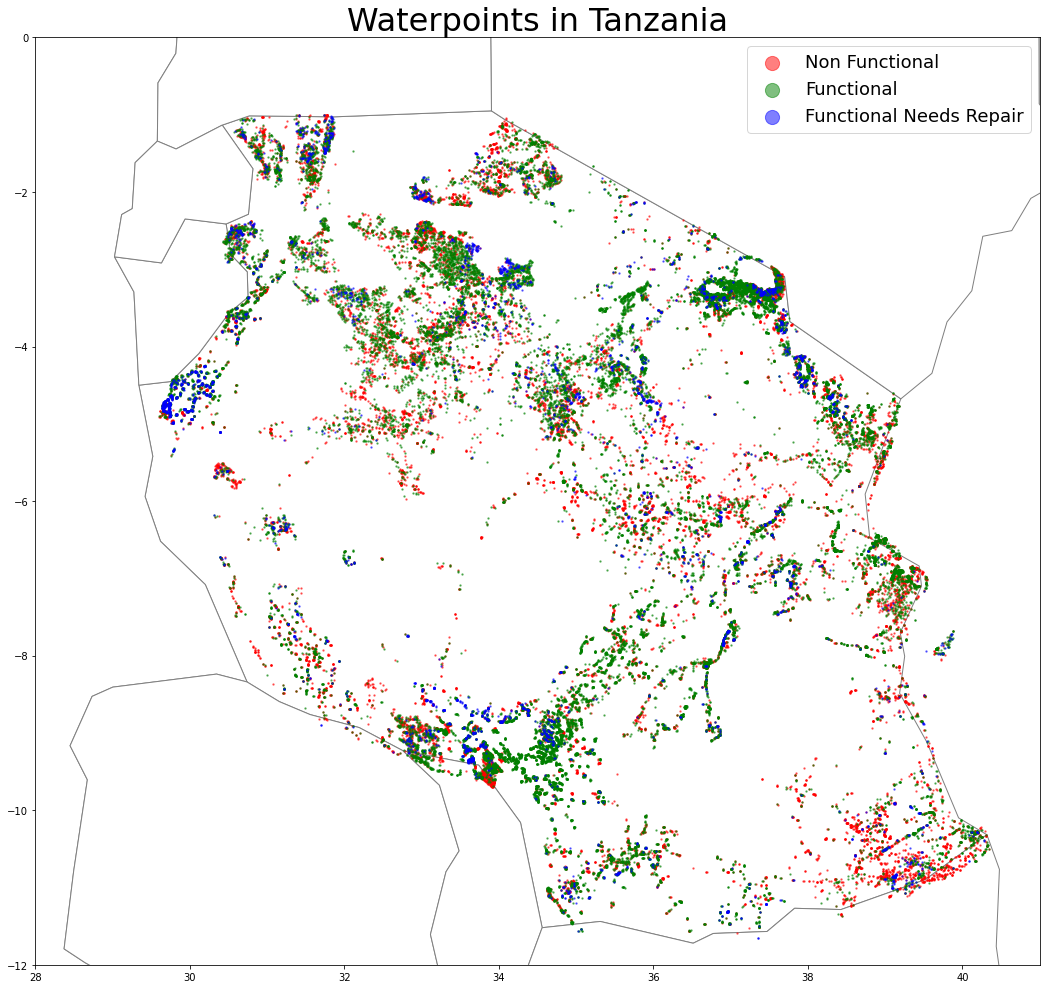

In [88]:


rcParams['figure.figsize'] = 18, 30

gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.longitude, data.latitude))

functional = gdf.where(gdf['status_group'] == 'functional')
repair = gdf.where(gdf['status_group'] == 'functional needs repair')
broken = gdf.where(gdf['status_group'] == 'non functional')

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='white', edgecolor='gray')

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=2, label='Non Functional')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=2, label='Functional')

ax.scatter(repair['longitude'], repair['latitude'],
           c='blue', alpha=.5, s=2, label='Functional Needs Repair')


plt.ylim(-12, 0)
plt.xlim(28,41)

plt.legend(fontsize=18, markerscale=10)

plt.title('Waterpoints in Tanzania', fontsize=32)

plt.show()


### Visualization of the cleaned data.

**Identifying Categirical features**

In [89]:
# writing a function to identify categorical features in the dataset.
def identify_categorical_features(clean_data):
    """
    This function returns a list of categorical features in a pandas DataFrame
    """
    categorical_features = []
    for col in clean_data.columns:
        if clean_data[col].dtype == object:
            categorical_features.append(col)
    return categorical_features
categorical_features = identify_categorical_features(clean_data)
print("Categorical Features:", categorical_features)

Categorical Features: ['funder', 'installer', 'subvillage', 'region', 'lga', 'ward', 'extraction_type', 'management', 'payment', 'water_quality', 'quantity', 'source', 'waterpoint_type', 'status_group']


**Identifying numerical features**

In [90]:
# Identifying numeric features in the dataset
# select only the numeric columns
numeric_columns = clean_data.select_dtypes(include=['int', 'float']).columns.tolist()

# print the numeric columns
print("Numeric columns:", numeric_columns)

Numeric columns: ['gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year']


####  **What is the distribution of the well conditions in the data, represented by functional, non-functional, and functional needs repair?**

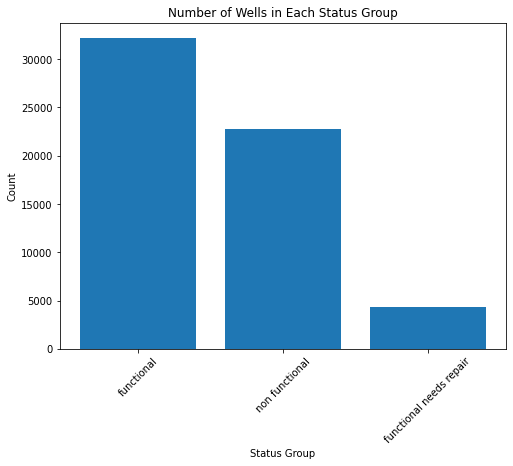

In [91]:
# Count the number of wells in each status group
status_group_counts = clean_data['status_group'].value_counts()

# Plot the count of wells in each status group as a bar chart
fig = plt.figure(figsize=(8, 6)) # set figure size
plt.bar(status_group_counts.index, status_group_counts.values)
plt.xlabel("Status Group")
plt.ylabel("Count")
plt.title("Number of Wells in Each Status Group")
plt.xticks(rotation=45)
plt.show()

In Tanzania, the majority of water pumps are functioning properly. However, there is a considerable number of water pumps that are not functional and a limited number that are operational but require maintenance.

#### **What is the relationship between numeric features in the dataset?**

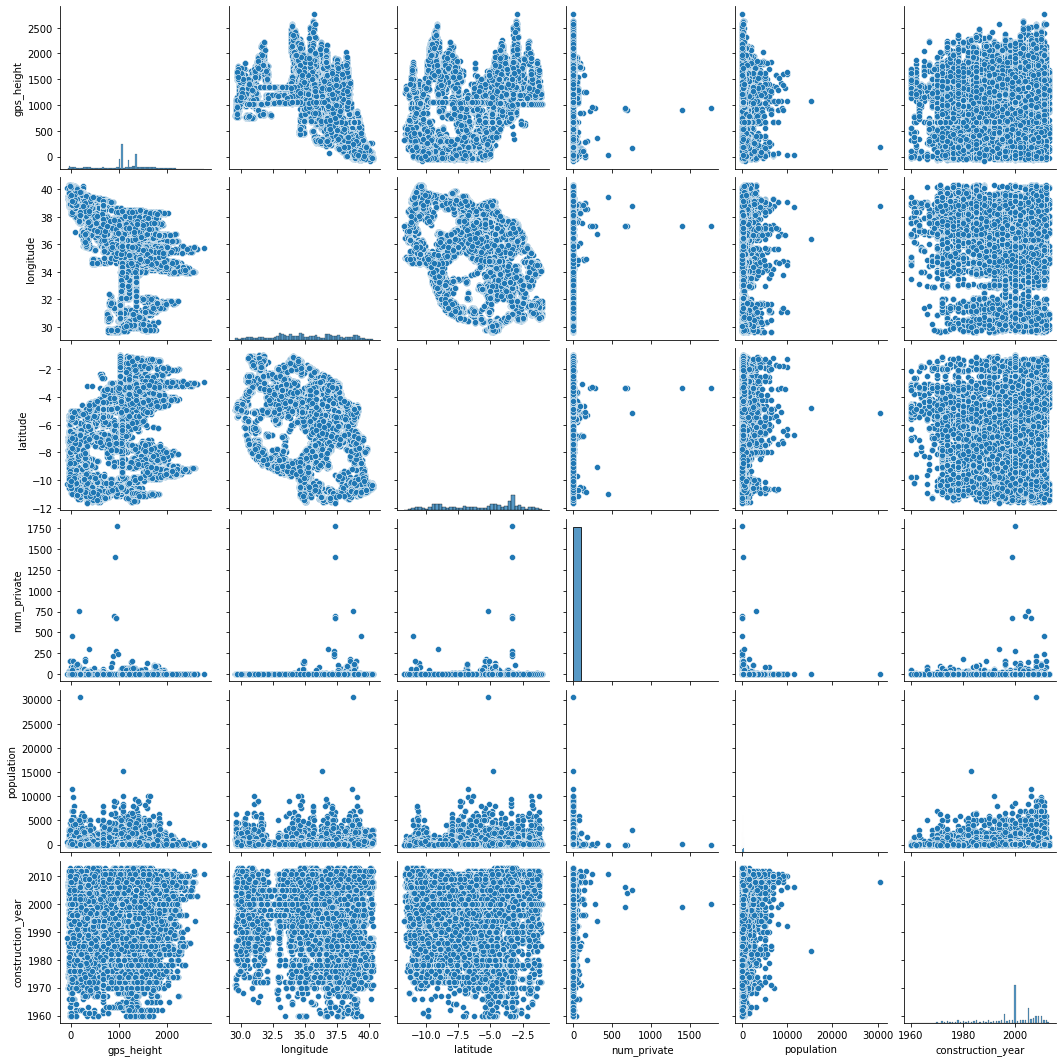

In [92]:
## Select only the numeric features
numeric_features = clean_data.select_dtypes(include=[np.number]).columns

# Generate the Pairplot
sns.pairplot(clean_data[numeric_features], height=2.5)

# Show the plot
plt.show()

#### **Time-series plot of the date_recorded against the number of wells in each condition to see if there is any trend in the well conditions over time**

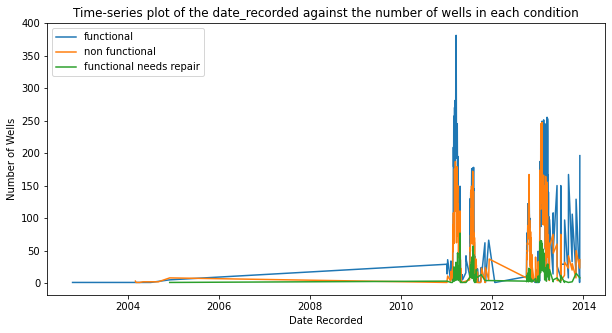

In [93]:
# Group data by date_recorded and status_group
grouped_data = clean_data.groupby(["date_recorded", "status_group"]).size().reset_index()
grouped_data.columns = ["date_recorded", "status_group", "count"]

# Plot the data
plt.figure(figsize=(10, 5))
for status in grouped_data["status_group"].unique():
    group = grouped_data[grouped_data["status_group"] == status]
    plt.plot(group["date_recorded"], group["count"], label=status)
plt.xlabel("Date Recorded")
plt.ylabel("Number of Wells")
plt.title("Time-series plot of the date_recorded against the number of wells in each condition")
plt.legend()
plt.show()


Based on the Time series plot, it is possible that there were changes or disruptions in the well maintenance or repair programs in the years around 2012-2014, which could have resulted in more fluctuation in the number of wells in each condition during that time. Additionally, external factors such as changes in funding or environmental factors could have affected the maintenance and repair of wells during that time. The high number of wells in each condition around 2012-2014 could be due to increased monitoring or inspection of the wells, while the more zigzag lines during that time period may reflect changes in the assessment or reporting of well conditions.

#### **Scatterplot of longitude and latitude against the well condition to see if there is any spatial pattern in the well conditions**

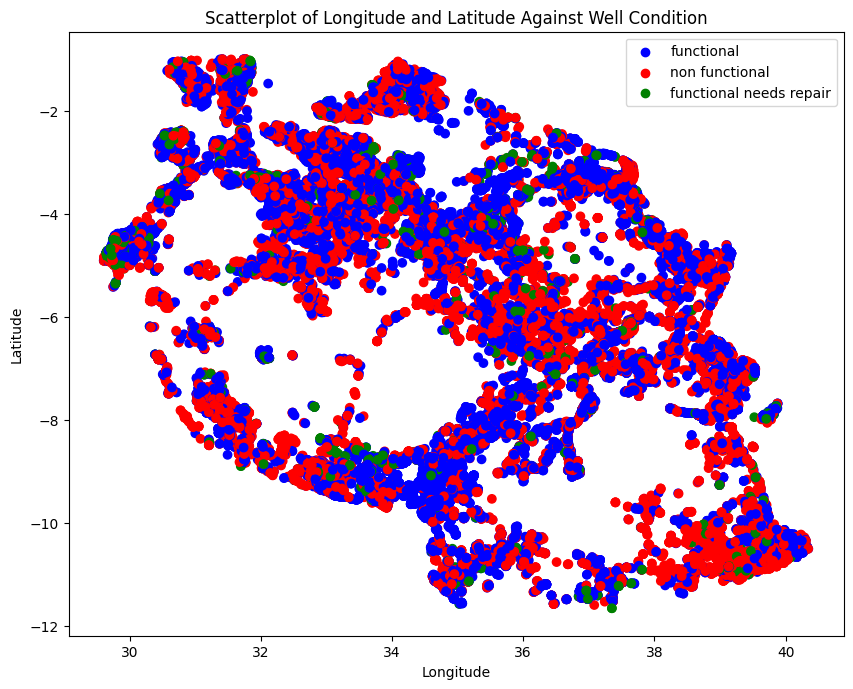

In [94]:
# specify the columns to be used for the scatterplot
x_col = "longitude"
y_col = "latitude"
condition_col = "status_group"

# create a dictionary to map the well condition to a specific color
condition_colors = {'functional': 'blue', 'non functional': 'red', 'functional needs repair': 'green'}
colors = clean_data[condition_col].map(condition_colors)

# create the scatterplot
fig = plt.figure(figsize=(10, 8), dpi=100)
plt.scatter(clean_data[x_col], clean_data[y_col], c=colors)

# add a legend
functional = plt.scatter([], [], c='blue', label='functional')
non_functional = plt.scatter([], [], c='red', label='non functional')
functional_needs_repair = plt.scatter([], [], c='green', label='functional needs repair')
plt.legend(handles=[functional, non_functional, functional_needs_repair])

# add a title and labels for the x and y axis
plt.title("Scatterplot of Longitude and Latitude Against Well Condition")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# show the plot
plt.show()

Observations indicate that there is a grouping of non-functional water sources in the southeastern, central, and southwestern areas. On the other hand, there are significant empty areas with no water sources present.

#### **Heatmap of the correlation matrix to see the correlation between the features and well condition**

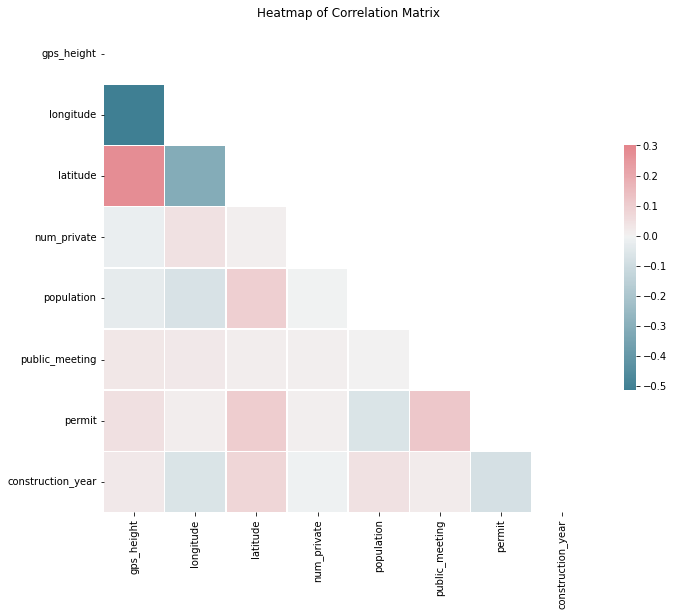

In [95]:
# Compute the correlation matrix
corr = clean_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title("Heatmap of Correlation Matrix")

# Show the plot
plt.show()

There could be a pretty high level of multicollinearity between some of these variables, just by looking at some of the dark patches on the heatmap
It looks like there's high multicolinearity between latitude and gps_height, permit and latitude.

**Normalized stacked bar charts**

In [96]:
#creating a normalized stacked bar chart that visualizes the distribution of a target variable "status_group" against
# the rest of the features in the cleaned data set.
def norm_stacked_bar_chart( clean_data, feature, title):
    """
    Display a horizontal stacked bar chart for a given feature and its labels
    
    Parameters:
    df: dataframe
    feature: feature from dataframe
    title: title of vizualization
    
    """
    feature_values =  clean_data[feature].unique()
    functional = []
    non_functional = []
    functional_needs_repair = []
    # create lists of the count for each label per feature value
    for value in feature_values:
        functional.append(len( clean_data[( clean_data[feature] == value) & ( clean_data['status_group'] == 'functional')]))
        non_functional.append(len( clean_data[( clean_data[feature] == value) & ( clean_data['status_group'] == 'non functional')]))
        functional_needs_repair.append(len( clean_data[( clean_data[feature] == value) & ( clean_data['status_group'] == 'functional needs repair')]))
    
    # convert the lists to np.arrays for math operations
    functional = np.array(functional)
    non_functional = np.array(non_functional)
    functional_needs_repair = np.array(functional_needs_repair)
    sum_of_labels = functional + non_functional + functional_needs_repair
    
    # normalize the data
    functional_norm = functional / sum_of_labels * 100
    non_functional_norm = non_functional / sum_of_labels * 100
    functional_needs_repair_norm = functional_needs_repair / sum_of_labels * 100

    plt.figure(figsize=(10,8)) 
    
    plt.barh(feature_values, functional_norm, label='functional')
    plt.barh(feature_values, non_functional_norm, left=functional_norm, label='non functional')
    plt.barh(feature_values, functional_needs_repair_norm, left=functional_norm + non_functional_norm, label='functional needs repair')
    
    plt.yticks(fontsize=16)
    
    plt.legend(fontsize=16, loc='center left', bbox_to_anchor=(1.05,0.5))
    
    plt.title(title, fontsize=20)
    plt.show()

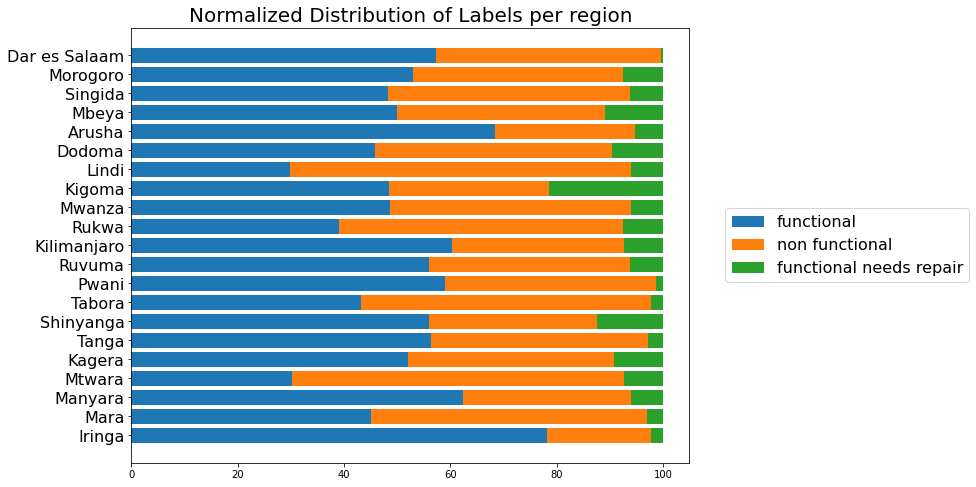

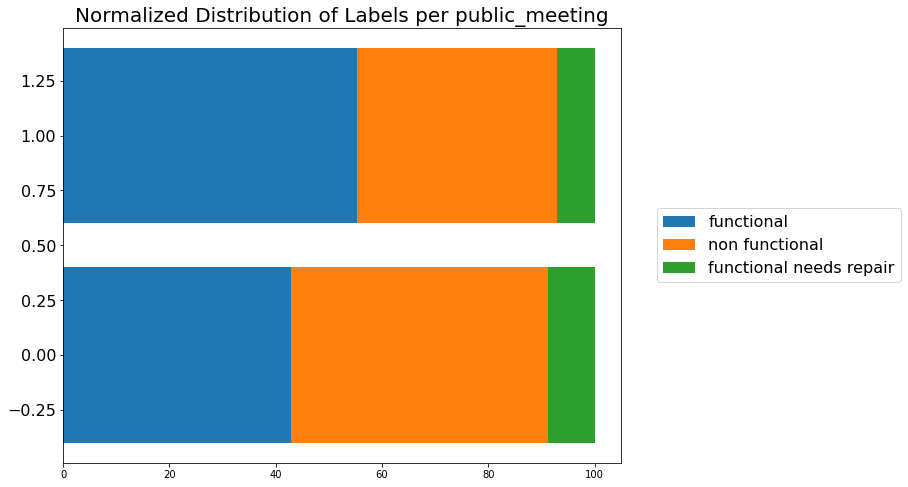

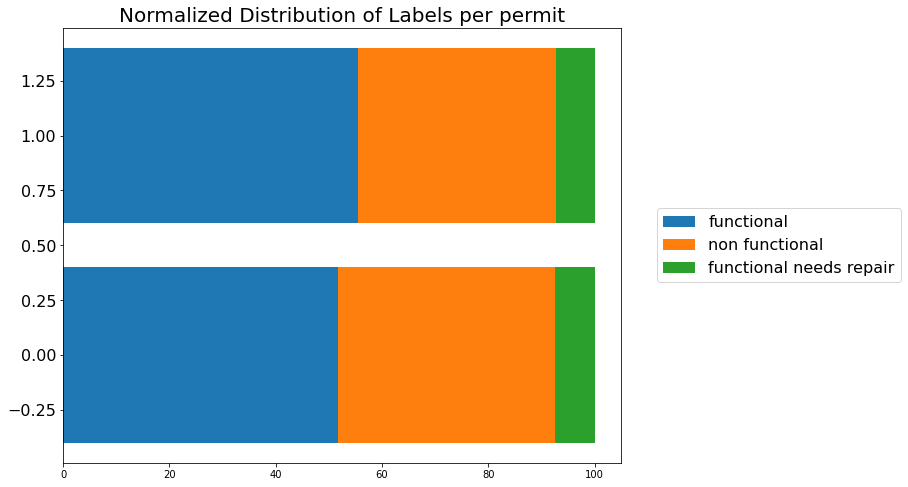

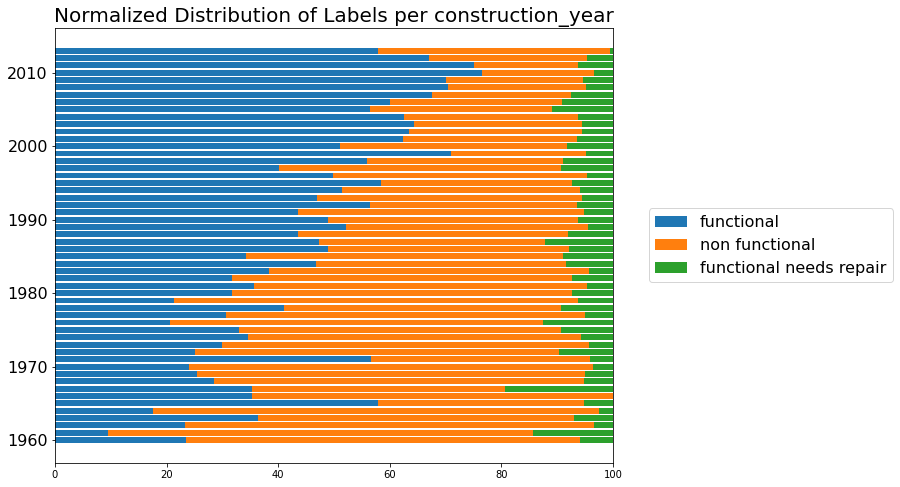

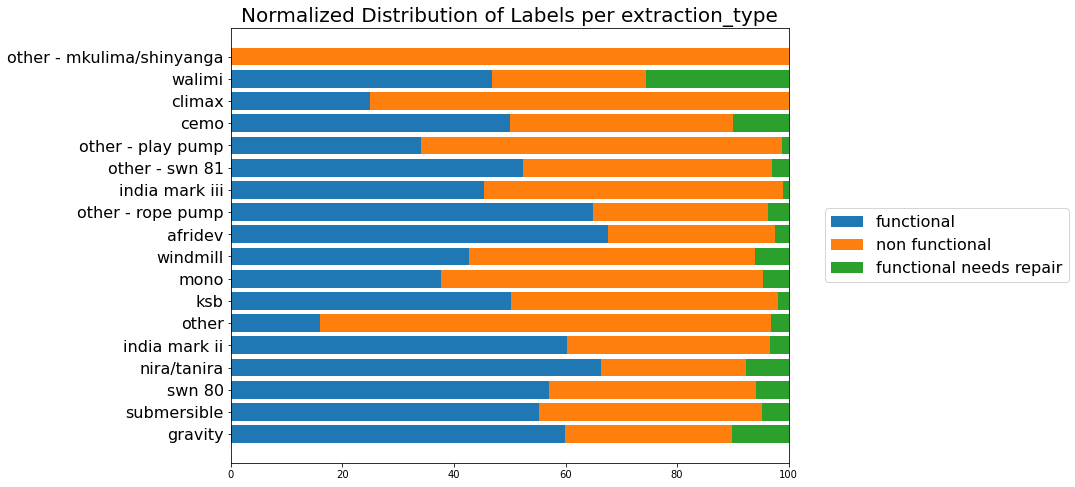

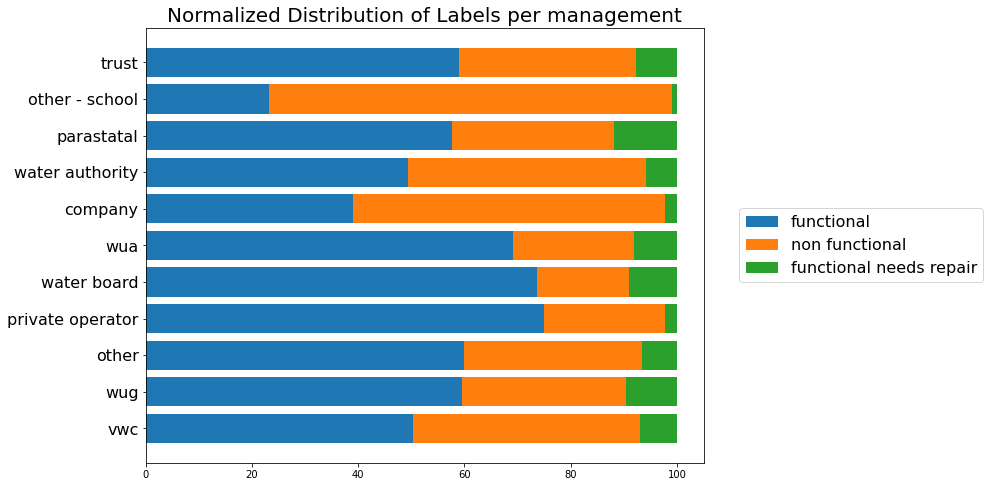

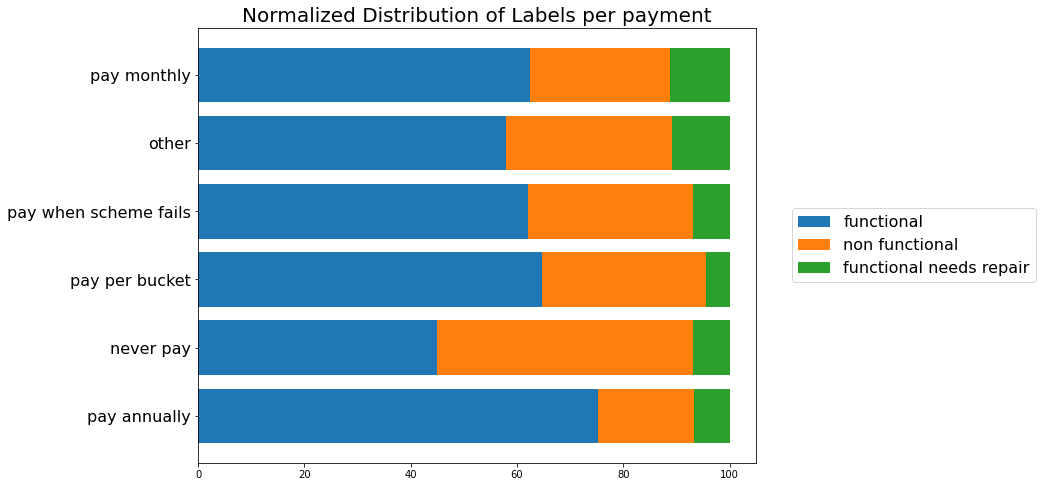

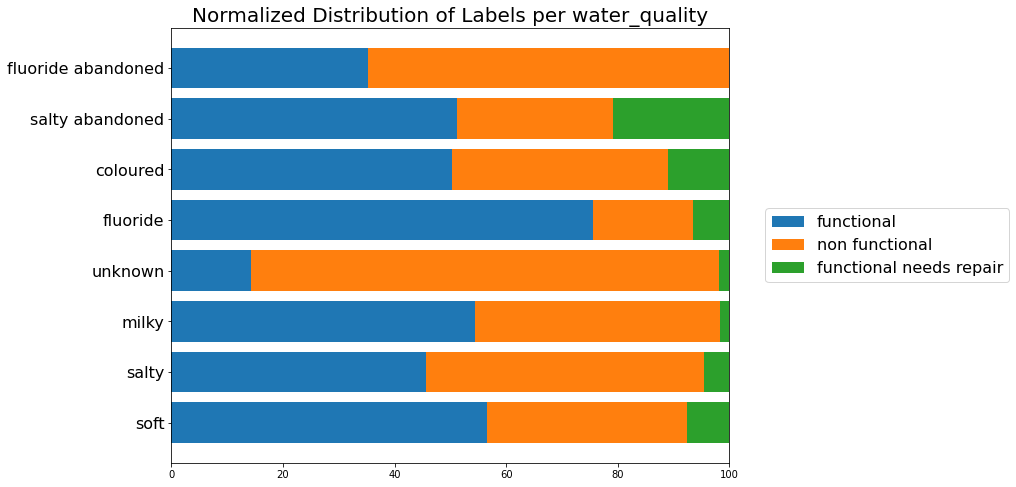

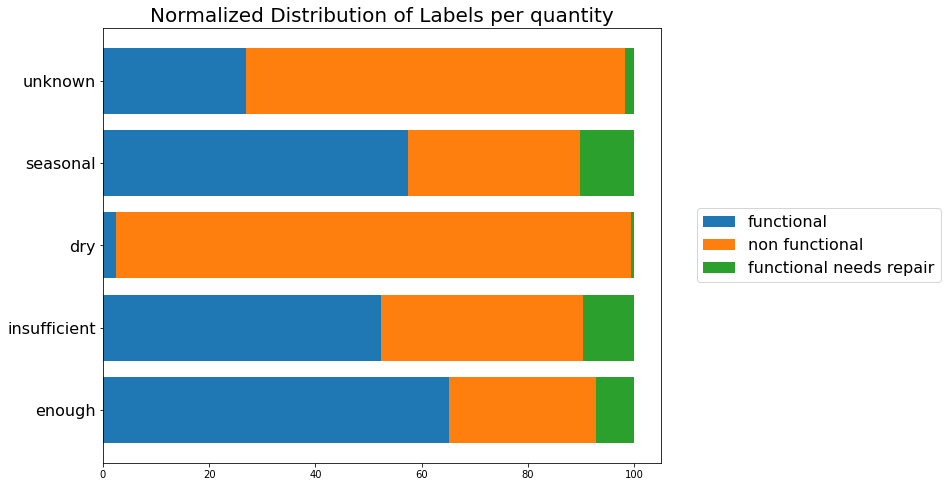

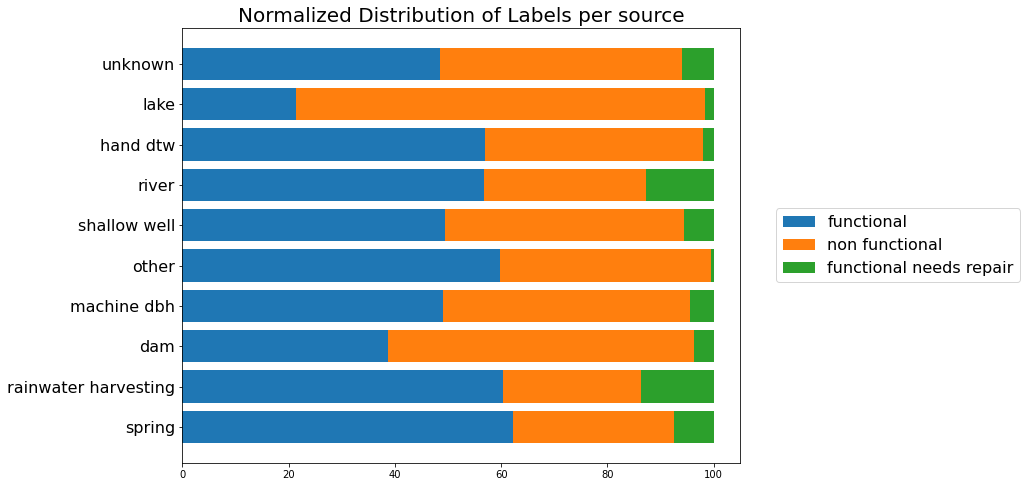

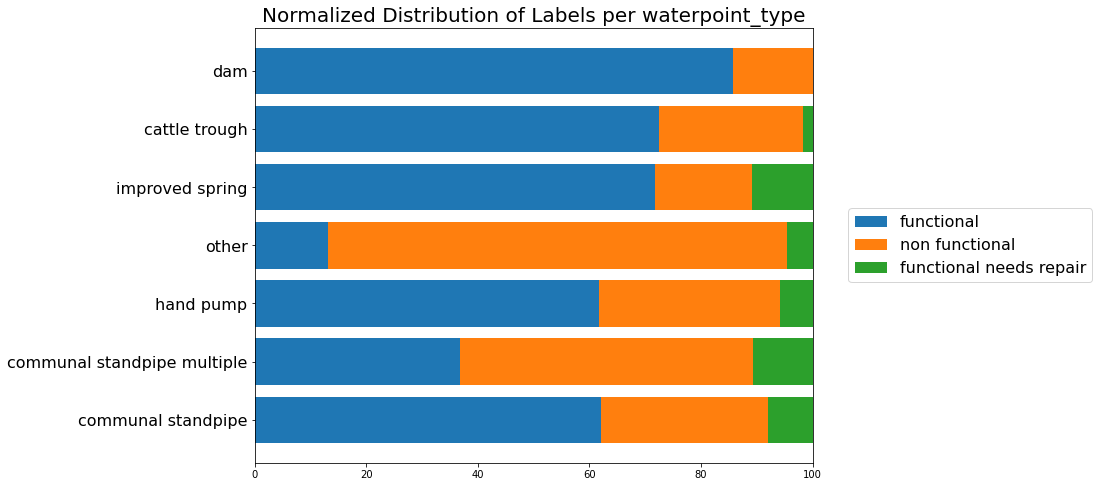

In [97]:
# finding features in clean_data with a cardinality (the number of unique values) less than value 'n'
def get_low_card_features(clean_data, n):
    """Given a dataframe return a list of the features with a cardinalty less than n"""
    feature_list = []
    for col in list(clean_data.columns): # .select_dtypes(include=['bool', 'object'])
        if len(clean_data[col].value_counts()) < n:
            feature_list.append(col)
    return feature_list

# remove the labels from the list of features
low_card_features = get_low_card_features(clean_data.drop('status_group', axis=1), 60)

# creating a series of stacked bar charts to visualize the distribution of labels
# (functional, non-functional, functional needs repair)for each low cardinality feature.
for feature in low_card_features:
    norm_stacked_bar_chart(clean_data, feature, f'Normalized Distribution of Labels per {feature}')

The EDA aimed to understand the relationship between various features (installer, funder, extraction type, etc.) and the well condition (functional, non-functional, and functional needs repair). The visualizations included bar charts, scatterplots, time-series plots, pairplots, Normalized stacked bar charts and heatmaps.
The bar chart showed the general overview of the well conditions, the scatterplot of longitude and latitude revealed any spatial patterns in the well conditions, while the time-series plot showed any trends over time. The pairplot and heatmap of the correlation matrix helped to identify any linear relationships and correlations between the features and well condition.
The Normalized stacked bar charts  compared the proportion of multiple categories within the data set. The total height of each bar was scaled to a common value, 100%, allowing for direct comparison of the relative sizes of the different categories.This helped to quickly identify patterns and trends, and provide an overview of complex data set


The EDA analysis revealed that the dataset is imbalanced with  class "functional needs repair" being a rare minority in the dataset, while "functional" and "non-functional" have relatively equal numbers. Out of the 23 features remaining after cleaning, 15 are nominal categorical, 2 are boolean, and 6 are continuous numerical. Of the categorical features, 5 have a high number of unique values (over 100).

None of the continuous numerical features show significant correlation with the target, but some categorical and boolean features do:

Region: Lindi, Mtwara, and Rukwa are more likely to be non-functional; Arusha and Iringa are more likely to be functional
Construction Year: older waterpoints are more likely to be non-functional
Extraction Type: some types are more likely to be functional (Walimi) or non-functional (Other - mkulima/shinyanga, Other - Play, Other - Non-Functional)
Management: SWC (Soil and Water Conservation) is more likely to be non-functional, while Water Board, WUA (Water Users Assoc.), and Private Operator are more likely to be functional
Payment: paying annually is more likely to be functional
Water Quality: some types are more likely to be functional (Fluoride) or non-functional (Fluoride - abandoned, Unknown)
Quantity: unknown and dry are more likely to be non-functional
Source: lake is more likely to be non-functional
Waterpoint Type: Dam, Cattle Trough, and Improved Spring are more likely to be functional
By considering all these features and running them through multiple classification models, we aim to improve the accuracy of our predictions.

### Modeling

### **Baseline Model**.

In [98]:
# Split data into features and labels
y = clean_data.status_group
X = clean_data.drop('status_group', axis=1)

#Drop Unwanted Features
# high cardinality features
high_card = ['funder', 'installer', 'lga', 'subvillage', 'ward']

# not useful features
not_useful = ['date_recorded', 'longitude', 'latitude']

unwanted = high_card + not_useful
X = X.drop(unwanted, axis=1)

#Performing Train / Test Split
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

#Scale numeric Features
cols_to_scale = ['gps_height', 'num_private', 'population', 'construction_year']
ct = ColumnTransformer([('column_scaler', 
                        StandardScaler(), 
                        cols_to_scale)],
                      remainder='drop')
# Training Features
scaled_values_train = ct.fit_transform(X_train)
scaled_train_df = pd.DataFrame(scaled_values_train, columns=cols_to_scale)

#Test Features
scaled_values_test = ct.transform(X_test)
scaled_test_df = pd.DataFrame(scaled_values_test, columns=cols_to_scale)

#### **Encoding Categorical Features**

In [99]:

# creating an instance of the OneHotEncoder class from the sklearn.preprocessing module. 
# The handle_unknown parameter is set to 'ignore', which means that any categorical features that are present in the test data 
# but not in the training data will be ignored
ohe = OneHotEncoder(handle_unknown='ignore')

In [100]:
# creating a new variable X_train_cat which is a subset of the original X_train data. 
# The subset only includes columns with data types of either bool or object
X_train_cat = X_train.select_dtypes(include=['bool', 'object'])

In [101]:
# transforming categorical variables in the training set X_train_cat into 
# numerical variables using the OneHotEncoder method
ohe_values_train = ohe.fit_transform(X_train_cat).toarray()

In [102]:
 # transforming the categorical features in the X_train dataframe using one-hot encoding
ohe_train_df = pd.DataFrame(ohe_values_train, columns=ohe.get_feature_names(X_train_cat.columns))
ohe_train_df.shape

(44419, 90)

In [103]:
# selecting all the categorical data (represented as 'bool' or 'object' data types)
#  from the test data set and storing it in a new DataFrame "X_test_cat".
X_test_cat = X_test.select_dtypes(include=['bool', 'object'])

In [104]:
# transforming the categorical features of the test set using the one-hot 
# encoding scheme that was trained on the training set.
ohe_values_test = ohe.transform(X_test_cat).toarray()

In [105]:
# performing one-hot encoding on the categorical variables of the test data
ohe_test_df = pd.DataFrame(ohe_values_test, columns=ohe.get_feature_names(X_test_cat.columns))

#### **Combine encoded and scaled features**

In [106]:
# concatenating two pandas dataframes ohe_train_df and scaled_train_df 
# along the columns (axis=1) to form a new dataframe X_train_combined
X_train_combined = pd.concat([ohe_train_df, scaled_train_df],axis=1)
X_train_combined.shape

(44419, 94)

In [107]:
# concatenating two data frames ohe_test_df and scaled_test_df 
# along the column axis (axis=1) to create a combined data frame X_test_combined
X_test_combined = pd.concat([ohe_test_df, scaled_test_df],axis=1)
X_test_combined.shape

(14807, 94)

#### **Encode Labels**

In [108]:

# creating an instance of the LabelEncoder class from the scikit-learn 
# library to encode categorical variables as integers
le = LabelEncoder()

# transforming the target variable y_train from its original format, which is 
# categorical, into a numerical format by using the LabelEncoder class 
# from the scikit-learn library
y_train_combined = le.fit_transform(y_train)

# transforming the target variable y_test into numerical format 
# using the LabelEncoder class from scikit-learn library
y_test_combined = le.transform(y_test)

### **Logistic Regression Model**

In [109]:
# Defining the Model
logreg = LogisticRegression(solver='saga', 
                            random_state=RANDOM_SEED, 
                            multi_class='ovr',
                            max_iter=10000,
                           n_jobs=-1)

In [110]:
# Fit The Model
model_log = logreg.fit(X_train_combined, y_train_combined)

**Model Predictions**

In [111]:
# Training features
y_hat_train = model_log.predict(X_train_combined)

In [112]:
# Testing features
y_hat_test = model_log.predict(X_test_combined)

### Classification Reports

In [113]:
# printing the classification report for the  model on the training data
print(classification_report(y_train_combined, y_hat_train, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.71      0.91      0.80     24146
functional needs repair       0.33      0.01      0.01      3188
         non functional       0.79      0.63      0.70     17085

               accuracy                           0.74     44419
              macro avg       0.61      0.52      0.50     44419
           weighted avg       0.72      0.74      0.71     44419



In [114]:

#  printing the classification report for the model on the test data
print(classification_report(y_test_combined, y_hat_test, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.71      0.90      0.79      8025
functional needs repair       0.26      0.00      0.01      1106
         non functional       0.78      0.63      0.70      5676

               accuracy                           0.73     14807
              macro avg       0.58      0.51      0.50     14807
           weighted avg       0.70      0.73      0.70     14807



### Confusion Matrices

<Figure size 576x432 with 0 Axes>

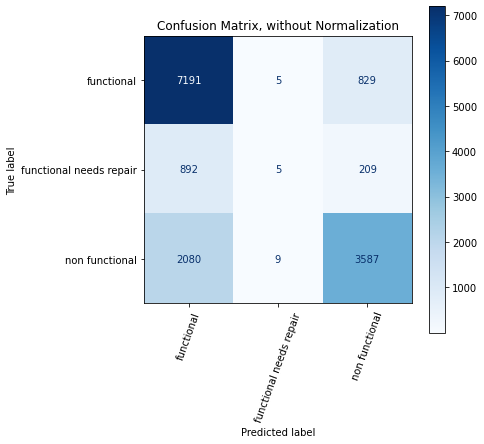

In [115]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function 
# from scikit-learn

fig = plt.figure(figsize=(8, 6)) # set figure size

matrix = plot_confusion_matrix(model_log, X_test_combined, y_test_combined,
                            display_labels=le.classes_,
                            cmap=plt.cm.Blues,
                            xticks_rotation=70)

matrix.ax_.set_title('Confusion Matrix, without Normalization')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()



<Figure size 576x432 with 0 Axes>

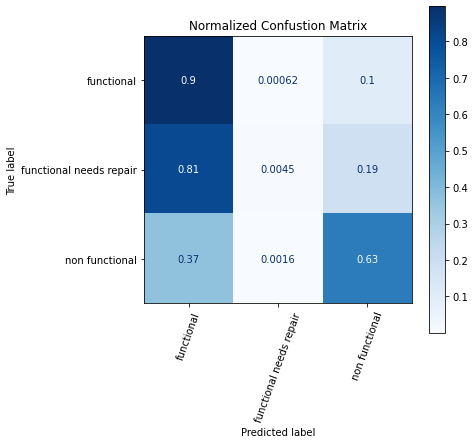

In [116]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function 
# from scikit-learn
fig = plt.figure(figsize=(8, 6)) # set figure size
matrix_norm = plot_confusion_matrix(model_log, X_test_combined, y_test_combined,
                                   display_labels=le.classes_,
                                   cmap=plt.cm.Blues,
                                   normalize='true',
                                   xticks_rotation=70)
matrix_norm.ax_.set_title('Normalized Confustion Matrix')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

### Calculate the AUC Score for Multiple Classes

In [117]:
# preparing the true labels and predicted labels for multiclass classification evaluation metrics. 
# Specifically, it is converting the true labels y_test_combined from a string representation to a binary matrix representation 
# using LabelBinarizer() so that it can be compared to the predicted probabilities of the model 
# convert labels from shape n, to n,3
lb = LabelBinarizer()
lb.fit(y_test_combined)
y_test_multi = lb.transform(y_test_combined)
y_hat_test_multi = model_log.predict_proba(X_test_combined)

In [118]:
# computing the Area Under the Receiver Operating Characteristic Curve 
# (AUC-ROC) score
roc_auc_score(y_test_combined, y_hat_test_multi, multi_class='ovr')

0.8152030177283839

### Multiclass ROC Curves

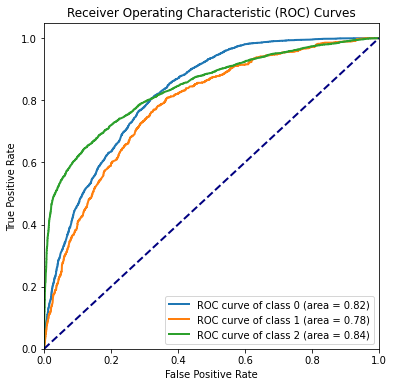

In [119]:
def plot_roc_curves(y_test, y_hat, classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i, class_ in enumerate(classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_hat[:, i])
        roc_auc[i] = roc_auc_score(y_test[:, i], y_hat[:, i])
        
    plt.figure(figsize=(6, 6))
    lw = 2
    for i in range(len(classes)):
        plt.plot(fpr[i], tpr[i],
                 lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(classes[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curves(y_test_multi, y_hat_test_multi, lb.classes_)

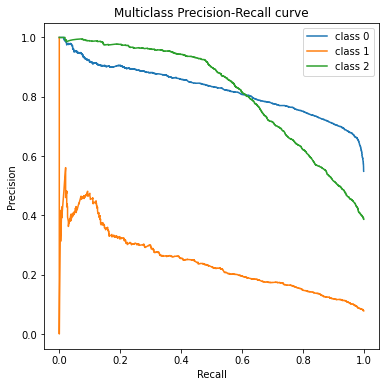

In [120]:
#  performing multi-class classification using a One-vs-Rest strategy with a logistic regression model
# to show show the relationship between precision and recall for each class and 
# give an overall idea of how the model is performing for each class.
# fit the one vs rest classifier on the model
from sklearn.metrics import precision_recall_curve
ovr = OneVsRestClassifier(model_log)
ovr.fit(X_test_combined, y_test_multi)

# get the predicted probabilities for each class
y_score = ovr.predict_proba(X_test_combined)

# loop through each class and generate a precision recall curve
classes = range(y_test_multi.shape[1])
plt.figure(figsize=(6, 6))
for i in classes:
    precision, recall, _ = precision_recall_curve(y_test_multi[:, i], y_score[:, i])
    plt.plot(recall, precision, label='class {}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Multiclass Precision-Recall curve')
plt.show()

The target variable has three classes: "functional," "functional needs repair," and "non-functional which corresponds to class 0, class 1 and class 2 respectively.
The model has the best performance for the "functional" class, with precision, recall, and F1-score above 0.7. However, it has poor performance for the "functional needs repair" class, with a low F1-score of 0.01 on both train and test sets. The performance for the "non-functional" class is moderate, with an F1-score of 0.70 on both train and test sets. The weighted average F1-score is 0.71 on both train and test sets.

The ROC-AUC score for the model is 0.82, indicating that the model has good discrimination power among the classes. The ROC curve and AUC values for each class show that the model performs well for all three classes.

The precision-recall (PR) curve and AUC values for each class show that the model performs well for the "functional" and "non-functional" classes, with AUC values of 0.82 and 0.81, respectively. However, the model performs poorly for the "functional needs repair" class, with an AUC value of only 0.22, indicating poor precision-recall tradeoff.

In conclusion, the baseline logistic regression model shows decent performance for the "functional" and "non-functional" classes, but poor performance for the "functional needs repair" class. This indicates the need for further feature engineering or more sophisticated models to improve the classification performance  for all three classes.
The test set's precision is measured at 0.73, which demonstrates a well-balanced fit between the training and test data. However, the precision and recall for the less frequently occurring class, "functional needs repair", are alarmingly low at 0.36 and 0.02. The ROC curve for the same class is extremely inadequate at 0.51, rendering it an ineffective predictor. This unsatisfactory outcome for the minority class is expected given the imbalance of the classes. Nevertheless, the ability to accurately predict the status of the "functional needs repair" waterpumps is crucial, as they require prioritized attention for maintenance.

### Logistic Regression with SMOTE

#### Defining the Pipeline

In [121]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_SEED)

In [122]:
# high cardinality features
high_card = ['funder', 'installer', 'lga', 'subvillage', 'ward']

# not useful features
not_useful = ['date_recorded', 'longitude', 'latitude']

unwanted = high_card + not_useful

In [123]:
# defining a list of columns that need to be scaled.
cols_to_scale = ['gps_height', 'num_private', 'population', 'construction_year']

In [124]:
#defining a list of categorical features, which are features that have a 
# limited number of possible values and don't have a clear mathematical 
# relationship between each other. 
# Then creating a pipeline for transforming these categorical features
categorical_features = ['region',
                         'public_meeting',
                         'permit',
                         'extraction_type',
                         'management',
                         'payment',
                         'water_quality',
                         'quantity',
                         'source',
                         'waterpoint_type']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [125]:
# defining a pipeline for transforming numeric data
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [126]:
# defining a preprocessor for data preprocessing
preprocessor = ColumnTransformer(remainder='drop',
                                 transformers=[('num', numeric_transformer, cols_to_scale),
                                              ('cat', categorical_transformer, categorical_features)])

In [127]:
# defining a pipeline for the logistic regression model for multiclass classification. 
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                         ('sampling', SMOTE(random_state=RANDOM_SEED, n_jobs=-1, sampling_strategy='auto')),
                        ('classifier', LogisticRegression(solver='saga', 
                                                          random_state=RANDOM_SEED,
                                                          multi_class='ovr',
                                                          max_iter=10000,
                                                          n_jobs=-1))])

#### Encode Labels

In [128]:

# transforming the target variable y_train from its original format, which is 
# categorical, into a numerical format by using the LabelEncoder class 
# from the scikit-learn library
y_train_combined = le.fit_transform(y_train)

In [129]:
# transforming the target variable y_test into numerical format 
# using the LabelEncoder class from scikit-learn library
y_test_combined = le.transform(y_test)

#### Logistic Regression Model

In [130]:
# training a logistic regression model on the training data "X_train" 
# and the target variable "y_train_combined"
logreg.fit(X_train, y_train_combined)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'num_private',
                                                   'population',
                                                   'construction_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'public_meeting',
                                                   'permit', 'extraction_type',
                                                   'management', 'payment',
                                               

Model Predictions

In [131]:
# Training features
y_hat_train = logreg.predict(X_train)

In [132]:
# Testing features
y_hat_test = logreg.predict(X_test)

Classification Reports

In [133]:
#  printing the classification report for the  model on the training data
print(classification_report(y_train_combined, y_hat_train, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.78      0.60      0.68     24146
functional needs repair       0.16      0.64      0.26      3188
         non functional       0.78      0.62      0.70     17085

               accuracy                           0.61     44419
              macro avg       0.58      0.62      0.54     44419
           weighted avg       0.74      0.61      0.65     44419



In [134]:
#  printing the classification report for the model on the test data
print(classification_report(y_test_combined, y_hat_test, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.78      0.59      0.67      8025
functional needs repair       0.18      0.67      0.28      1106
         non functional       0.78      0.63      0.69      5676

               accuracy                           0.61     14807
              macro avg       0.58      0.63      0.55     14807
           weighted avg       0.73      0.61      0.65     14807



Confusion Matrices

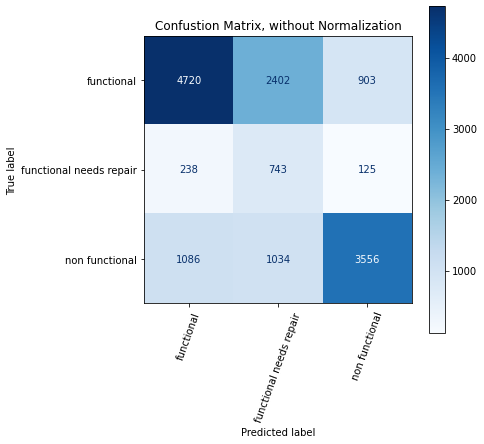

In [135]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function 
# from scikit-learn.
matrix = plot_confusion_matrix(logreg, X_test, y_test_combined,
                            display_labels=le.classes_,
                            cmap=plt.cm.Blues,
                            xticks_rotation=70)
matrix.ax_.set_title('Confustion Matrix, without Normalization')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()


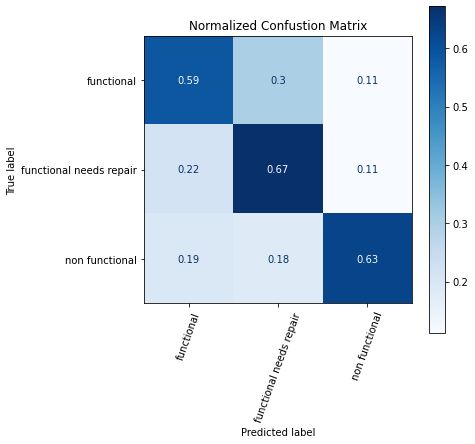

In [136]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function 
# from scikit-learn.
matrix_norm = plot_confusion_matrix(logreg, X_test, y_test_combined,
                                   display_labels=le.classes_,
                                   cmap=plt.cm.Blues,
                                   normalize='true',
                                   xticks_rotation=70)
matrix_norm.ax_.set_title('Normalized Confustion Matrix')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

**Computing Multiclass AUC Score**

In [137]:
# convert labels from shape n, to n,3
lb = LabelBinarizer()
lb.fit(y_test_combined)
y_test_multi = lb.transform(y_test_combined)
y_hat_test_multi = logreg.predict_proba(X_test)
# y_hat_test_multi = lb.transform(logreg.predict(X_test))

In [138]:
# computing the ROC AUC (Receiver Operating Characteristic - Area Under 
# the Curve) score for the multiclass classification
roc_auc_score(y_test_combined, y_hat_test_multi, multi_class='ovr')

0.8091710368605703

**Multiclass ROC Curves**

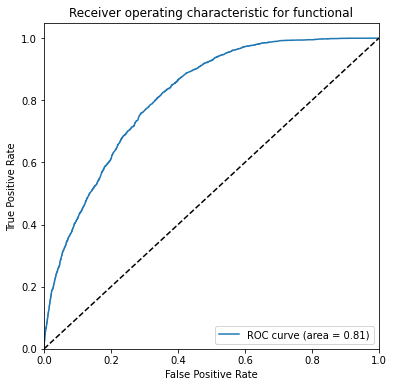

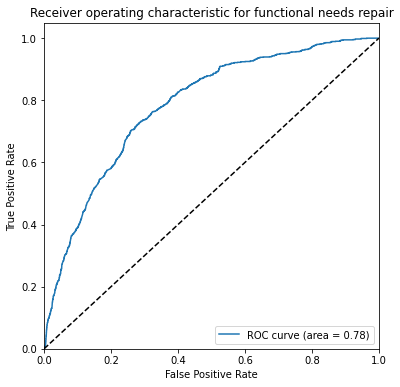

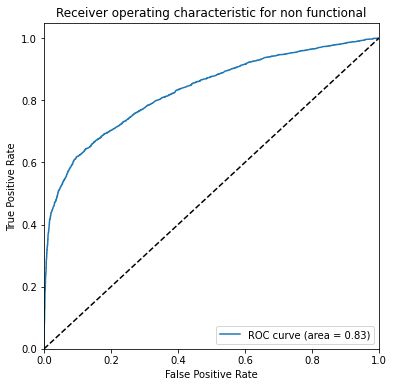

In [139]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, class_ in enumerate(le.classes_):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {class_}')
    plt.legend(loc="lower right")
    plt.show()

In comparison to the benchmark model, the outcomes are not consistent. While the general precision decreased from 0.73 to 0.61, the average AUC rating boosted from 0.67 to 0.71. Additionally, recall is balanced, demonstrating a substantial rise for the minority group. Notably, the recall for the minority group is the highest, making it the most crucial class to consider when evaluating potential well sites to visit.

Decision Tree with SMOTE

In [140]:
 # defining  pipeline using the scikit-learn library and storing in the variable clf
clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('sampling', SMOTE(random_state=RANDOM_SEED, n_jobs=-1, sampling_strategy='minority')),
                        ('classifier', DecisionTreeClassifier(random_state=RANDOM_SEED))
                        ])

Decision Tree Model

In [141]:
# Fitting the model
clf.fit(X_train, y_train_combined)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'num_private',
                                                   'population',
                                                   'construction_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'public_meeting',
                                                   'permit', 'extraction_type',
                                                   'management', 'payment',
                                               

**Model Predictions**

In [142]:
# Training features
y_hat_train = clf.predict(X_train)

In [143]:
# Testing features
y_hat_test = clf.predict(X_test)

**Classification Reports**

In [144]:
# #  printing the classification report for the  model on the training data
print(classification_report(y_train_combined, y_hat_train, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.94      0.91      0.93     24146
functional needs repair       0.53      0.89      0.66      3188
         non functional       0.98      0.90      0.94     17085

               accuracy                           0.90     44419
              macro avg       0.82      0.90      0.84     44419
           weighted avg       0.93      0.90      0.91     44419



In [145]:
#  printing the classification report for the model on the test data
print(classification_report(y_test_combined, y_hat_test, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.79      0.75      0.77      8025
functional needs repair       0.27      0.51      0.35      1106
         non functional       0.78      0.71      0.74      5676

               accuracy                           0.71     14807
              macro avg       0.61      0.65      0.62     14807
           weighted avg       0.75      0.71      0.73     14807



**Confusion Matrices**

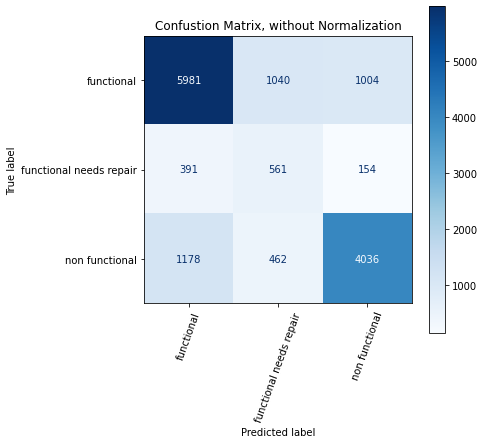

In [146]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix = plot_confusion_matrix(clf, X_test, y_test_combined,
                            display_labels=le.classes_,
                            cmap=plt.cm.Blues,
                            xticks_rotation=70)
matrix.ax_.set_title('Confustion Matrix, without Normalization')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

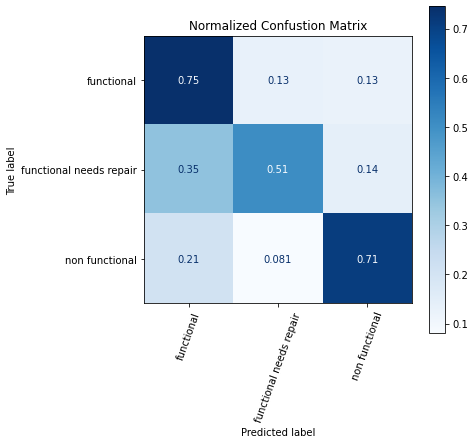

In [147]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix_norm = plot_confusion_matrix(clf, X_test, y_test_combined,
                                   display_labels=le.classes_,
                                   cmap=plt.cm.Blues,
                                   normalize='true',
                                   xticks_rotation=70)
matrix_norm.ax_.set_title('Normalized Confustion Matrix')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

**Computing Multiclass AUC Score**

In [148]:
# convert labels from shape n, to n,3
lb = LabelBinarizer()
lb.fit(y_test_combined)
y_test_multi = lb.transform(y_test_combined)
y_hat_test_multi = clf.predict_proba(X_test)
# y_hat_test_multi = lb.transform(clf.predict(X_test))

In [149]:
# computing the ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score for the multiclass classification.
roc_auc_score(y_test_combined, y_hat_test_multi, multi_class='ovr')

0.7735712591089651

**Computing Multiclass ROC Curves**

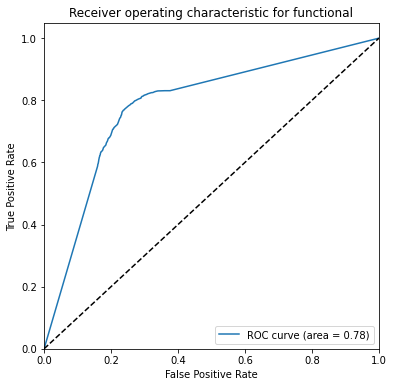

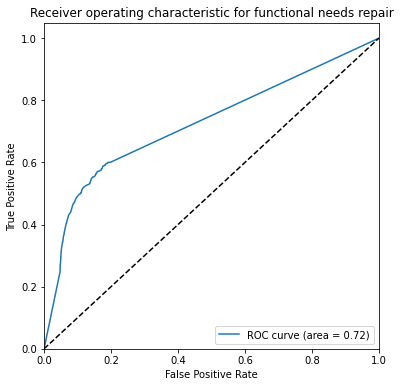

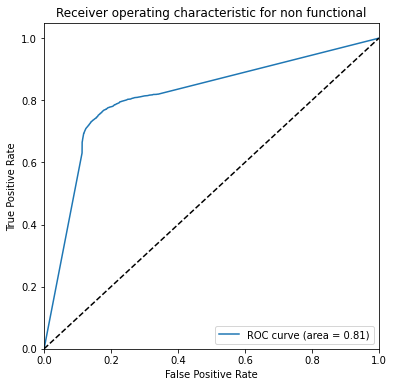

In [150]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, class_ in enumerate(le.classes_):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {class_}')
    plt.legend(loc="lower right")
    plt.show()


Compared to the benchmark model and the logistic regression with SMOTE technique, the results are mostly favorable. While the recall for the minority group decreased, the general accuracy improved from 0.61 to 0.71, although it still falls short of the baseline score of 0.73. Furthermore, the mean AUC score rose from 0.71 to 0.74. The recall for the majority groups also showed improvement.


**Random Forest with SMOTE**

In [151]:
# # defining  pipeline using the scikit-learn library and storing in the variable clf.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('sampling', SMOTE(random_state=RANDOM_SEED, n_jobs=-1, sampling_strategy='auto')),
                        ('classifier', RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=-1))
                        ])

**Random Forest Classifier Model**

In [152]:
# Fitting the model
clf.fit(X_train, y_train_combined)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'num_private',
                                                   'population',
                                                   'construction_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'public_meeting',
                                                   'permit', 'extraction_type',
                                                   'management', 'payment',
                                               

**Model Predictions**

In [153]:
# Training features
y_hat_train = clf.predict(X_train)

In [154]:
# Testing features
y_hat_test = clf.predict(X_test)

**Classification Reports**

In [155]:
# #  printing the classification report for the  model on the training data
print(classification_report(y_train_combined, y_hat_train, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.95      0.90      0.93     24146
functional needs repair       0.53      0.90      0.67      3188
         non functional       0.96      0.92      0.94     17085

               accuracy                           0.90     44419
              macro avg       0.82      0.90      0.84     44419
           weighted avg       0.93      0.90      0.91     44419



In [156]:
#  #  printing the classification report for the model on the test data
print(classification_report(y_test_combined, y_hat_test, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.81      0.77      0.79      8025
functional needs repair       0.30      0.51      0.38      1106
         non functional       0.80      0.75      0.77      5676

               accuracy                           0.74     14807
              macro avg       0.64      0.68      0.65     14807
           weighted avg       0.77      0.74      0.75     14807



**Confusion Matrices**

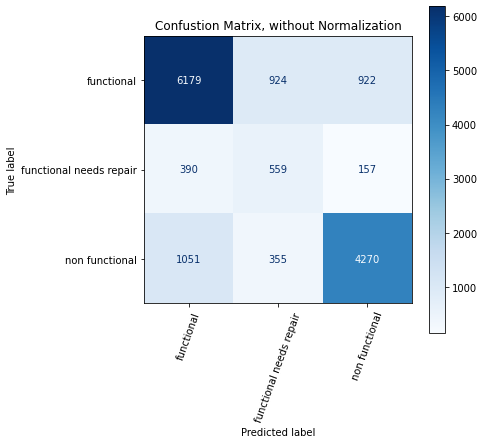

In [157]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix = plot_confusion_matrix(clf, X_test, y_test_combined,
                            display_labels=le.classes_,
                            cmap=plt.cm.Blues,
                            xticks_rotation=70)
matrix.ax_.set_title('Confustion Matrix, without Normalization')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()


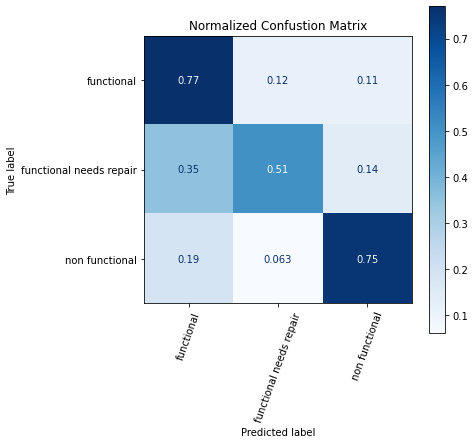

In [158]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix_norm = plot_confusion_matrix(clf, X_test, y_test_combined,
                                   display_labels=le.classes_,
                                   cmap=plt.cm.Blues,
                                   normalize='true',
                                   xticks_rotation=70)
matrix_norm.ax_.set_title('Normalized Confustion Matrix')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

**Compute Multiclass AUC Score**

In [159]:
# convert labels from shape n, to n,3
lb = LabelBinarizer()
lb.fit(y_test_combined)
y_test_multi = lb.transform(y_test_combined)
y_hat_test_multi = clf.predict_proba(X_test)
# y_hat_test_multi = lb.transform(clf.predict(X_test))

In [160]:
 # computing the ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score for the multiclass classification.
roc_auc_score(y_test_combined, y_hat_test_multi, multi_class='ovr')

0.8706291414522093

**Computing Multiclass ROC Curves**

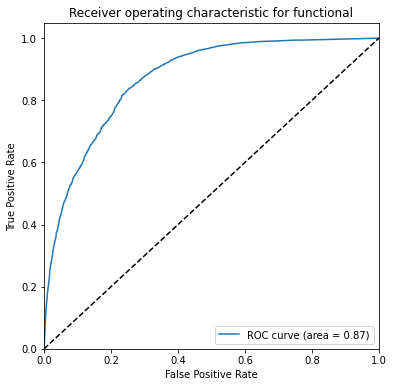

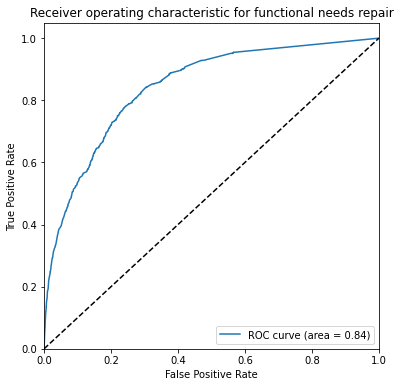

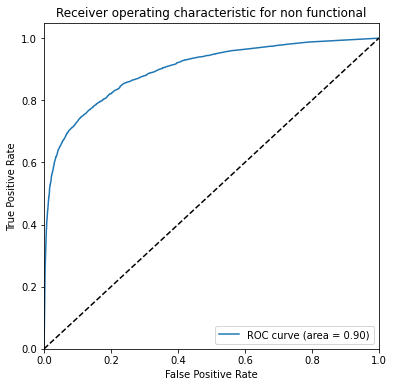

In [161]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, class_ in enumerate(le.classes_):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {class_}')
    plt.legend(loc="lower right")
    plt.show()

Compared to the baseline model and the logistic regression with SMOTE and Decision Tree with SMOTE, the results obtained from the latest iteration of the model have shown significant improvements. The mean ROC AUC has increased from 0.80 to 0.87, indicating a better model fit. The accuracy of the model has also increased to 0.75, which is higher than the previous models, and the recall rate for all classes has improved.

**XG Boost with SMOTE**

In [162]:
# defining  pipeline using the scikit-learn library and storing in the variable clf.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('sampling', SMOTE(random_state=RANDOM_SEED, n_jobs=-1, sampling_strategy='auto')),
                        ('classifier', XGBClassifier(random_state=RANDOM_SEED, n_jobs=-1))
                        ])

**XG Boost Classifier Model**

In [163]:
# Model fitting
clf.fit(X_train, y_train_combined)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['gps_height', 'num_private',
                                                   'population',
                                                   'construction_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'public_meeting',
                                                   'permit', 'extraction_type',
                                                   'management', 'payment',
                                               

**Model Predictions**

In [164]:
# Training features
y_hat_train = clf.predict(X_train)

In [165]:
# Testing features
y_hat_test = clf.predict(X_test)

**Classification Reports**

In [166]:
# #  printing the classification report for the  model on the training data
print(classification_report(y_train_combined, y_hat_train, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.75      0.69      0.72     24146
functional needs repair       0.19      0.54      0.28      3188
         non functional       0.82      0.62      0.71     17085

               accuracy                           0.66     44419
              macro avg       0.59      0.62      0.57     44419
           weighted avg       0.74      0.66      0.68     44419



In [167]:
# #  printing the classification report for the model on the test data
print(classification_report(y_test_combined, y_hat_test, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.76      0.70      0.73      8025
functional needs repair       0.20      0.56      0.30      1106
         non functional       0.81      0.63      0.71      5676

               accuracy                           0.66     14807
              macro avg       0.59      0.63      0.58     14807
           weighted avg       0.74      0.66      0.69     14807



**Confusion Matrices**

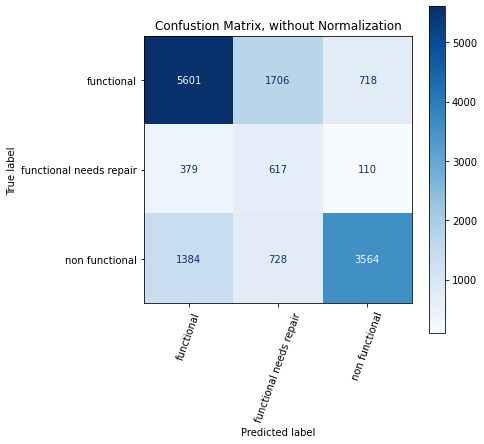

In [168]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix = plot_confusion_matrix(clf, X_test, y_test_combined,
                            display_labels=le.classes_,
                            cmap=plt.cm.Blues,
                            xticks_rotation=70)
matrix.ax_.set_title('Confustion Matrix, without Normalization')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

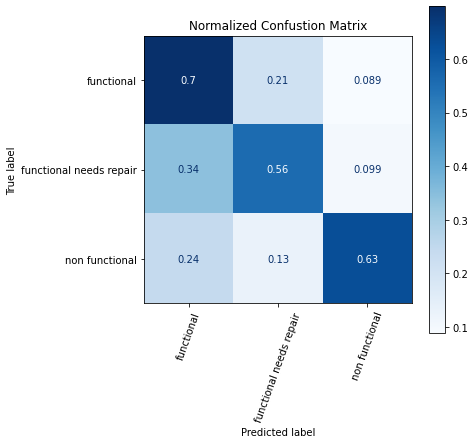

In [169]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix_norm = plot_confusion_matrix(clf, X_test, y_test_combined,
                                   display_labels=le.classes_,
                                   cmap=plt.cm.Blues,
                                   normalize='true',
                                   xticks_rotation=70)
matrix_norm.ax_.set_title('Normalized Confustion Matrix')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

**Computing Multiclass AUC Score**

In [170]:
# convert labels from shape n, to n,3
lb = LabelBinarizer()
lb.fit(y_test_combined)
y_test_multi = lb.transform(y_test_combined)
y_hat_test_multi = clf.predict_proba(X_test)
# y_hat_test_multi = lb.transform(clf.predict(X_test))

In [171]:
# # computing the ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score for the multiclass classification.
roc_auc_score(y_test_combined, y_hat_test_multi, multi_class='ovr')

0.8141582431813413

**Computing Multiclass ROC Curves**

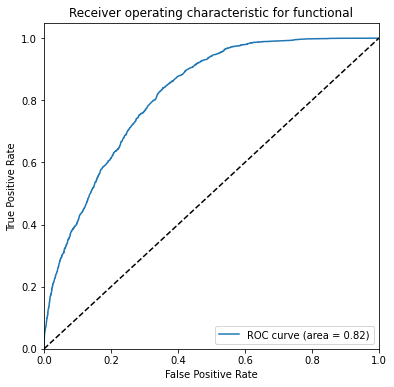

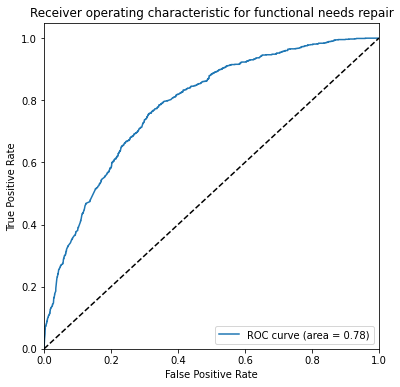

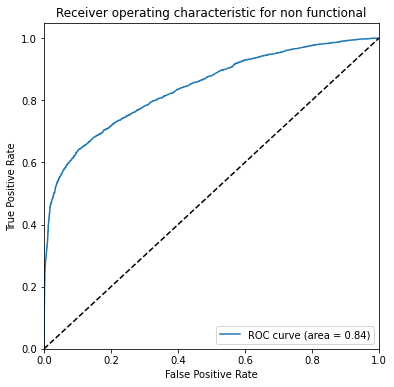

In [172]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, class_ in enumerate(le.classes_):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {class_}')
    plt.legend(loc="lower right")
    plt.show()

Positive
The model's training and test accuracy are close, indicating a good fit.
The recall for the minority class has improved and outperforms both the Decision Tree and Random Forest models.

Negative
However, the recall for the majority classes is not as strong as the Decision Tree and Random Forest models.
Although the recall is more balanced across all classes, the test accuracy is lower than the baseline, Decision Tree, and Random Forest models.
Additionally, the mean AUC score is lower compared to the Decision Tree and Random Forest models.

**Random Forest with SMOTE and Grid Search CV**

* Smote Auto
* Score Recall
* No High Cardinality

In [173]:
# creating a pipeline object called "pipe"
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                         ('sampling', SMOTE(random_state=RANDOM_SEED, n_jobs=-1, sampling_strategy='auto')),
                        ('classifier', RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=-1))
                        ])

**Random Forest Classifier Model**

In [174]:
# Fitting the model
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]
max_depth = [int(x) for x in np.linspace(20, 40, num = 4)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6]


# Create the random grid
parameters = [{'classifier__n_estimators': n_estimators,
              'classifier__max_depth': max_depth,
              'classifier__min_samples_split': min_samples_split,
              'classifier__min_samples_leaf': min_samples_leaf}]

scorers = {
    'recall_score': make_scorer(recall_score, average='macro')
}

gridsearch = RandomizedSearchCV(pipe, parameters, cv=3, random_state=RANDOM_SEED, 
                                scoring=scorers, n_jobs=-1, refit='recall_score',
                               n_iter=1)
clf = gridsearch.fit(X_train, y_train_combined)

In [175]:
# accessing the best parameters of our classifier object 'clf'.
clf.best_params_

{'classifier__n_estimators': 200,
 'classifier__min_samples_split': 5,
 'classifier__min_samples_leaf': 6,
 'classifier__max_depth': 40}

**Model Predictions**

In [176]:
# Training features
y_hat_train = clf.predict(X_train)

In [177]:
# Testing features
y_hat_test = clf.predict(X_test)

**Classification Reports**

In [178]:
#  printing the classification report for the  model on the training data
print(classification_report(y_train_combined, y_hat_train, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.84      0.76      0.80     24146
functional needs repair       0.31      0.73      0.43      3188
         non functional       0.86      0.75      0.80     17085

               accuracy                           0.75     44419
              macro avg       0.67      0.75      0.68     44419
           weighted avg       0.81      0.75      0.77     44419



In [179]:
#  printing the classification report for the model on the test data
print(classification_report(y_test_combined, y_hat_test, target_names=le.classes_))

                         precision    recall  f1-score   support

             functional       0.81      0.74      0.77      8025
functional needs repair       0.27      0.63      0.38      1106
         non functional       0.82      0.71      0.76      5676

               accuracy                           0.72     14807
              macro avg       0.63      0.69      0.64     14807
           weighted avg       0.77      0.72      0.74     14807



**Confusion Matrices**

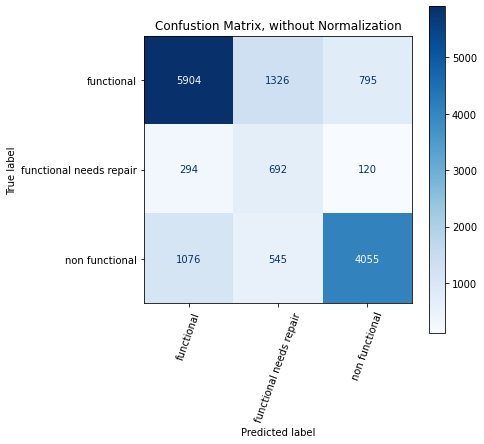

In [180]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix = plot_confusion_matrix(clf, X_test, y_test_combined,
                            display_labels=le.classes_,
                            cmap=plt.cm.Blues,
                            xticks_rotation=70,
                            values_format='')
matrix.ax_.set_title('Confustion Matrix, without Normalization')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()

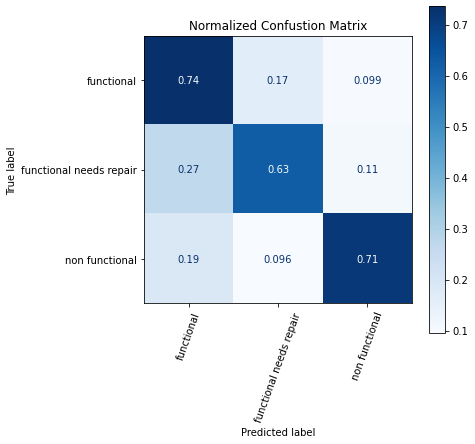

In [181]:
#  plotting the confusion matrix for the classifier clf on the test data X_test and 
# the true labels y_test_combined using the plot_confusion_matrix function from scikit-learn.
matrix_norm = plot_confusion_matrix(clf, X_test, y_test_combined,
                                   display_labels=le.classes_,
                                   cmap=plt.cm.Blues,
                                   normalize='true',
                                   xticks_rotation=70)
matrix_norm.ax_.set_title('Normalized Confustion Matrix')
fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.show()


**Computing Multiclass AUC Score**

In [182]:
# convert labels from shape n, to n,3
lb = LabelBinarizer()
lb.fit(y_test_combined)
y_test_multi = lb.transform(y_test_combined)
y_hat_test_multi = clf.predict_proba(X_test)
# y_hat_test_multi = lb.transform(clf.predict(X_test))

In [183]:
# computing the ROC AUC (Receiver Operating Characteristic - Area Under the Curve) score for the multiclass classification.
roc_auc_score(y_test_combined, y_hat_test_multi, multi_class='ovr')

0.8687546108483905

**Computing Multiclass ROC Curves**

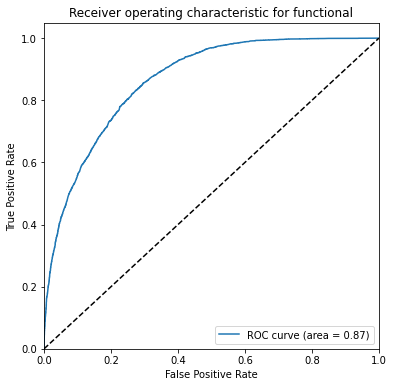

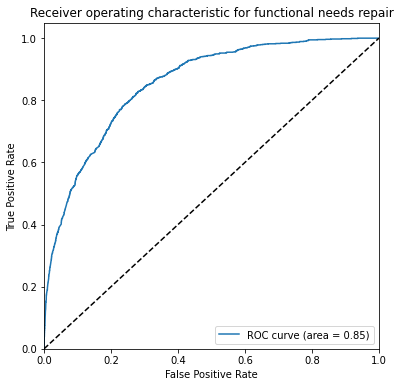

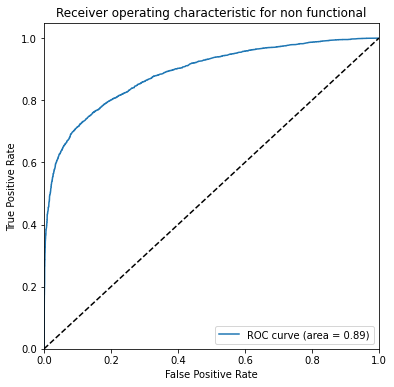

In [184]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, class_ in enumerate(le.classes_):
    plt.figure(figsize=(6, 6))
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for {class_}')
    plt.legend(loc="lower right")
    plt.show()

By adjusting the hyperparameters, we were able to significantly boost the Recall score for the underrepresented class while only causing a negligible drop in the Recall for the dominant class. Furthermore, the overfitting issue was also mitigated as evidenced by the smaller gap between the train and test accuracy scores. For the untuned Random Forest, the train and test accuracy scores were 0.91 and 0.75 respectively, but after tuning, they became 0.77 and 0.72.

**Comparison of Model Performance**

Performed this to determine the best performing model for our data

In [185]:
# creating a DataFrame with model performance metrics for a comparison of the six models we generated.
models = np.array(['Logistic Regression - Baseline', 'Logistic Regression with SMOTE',
         'Decision Tree', 'Random Forest', 'XGBoost', 'Random Forest - Tuned'])

recall_functional = np.array([0.91, 0.59, 0.74, 0.78, 0.69, 0.75])

recall_repair = np.array([0.01, 0.65, 0.46, 0.48, 0.57, 0.6])

recall_non_functional = np.array([0.62, 0.61, 0.7, 0.75, 0.61, 0.72])

train_acc = np.array([0.74, 0.61, 0.91, 0.91, 0.66, 0.77])

test_acc = np.array([0.73, 0.6, 0.71, 0.75, 0.65, 0.72])

auc_mean = np.array([0.81, 0.81, 0.8, 0.87, 0.81, 0.87])

columns = np.array(['model', 'Recall - Functional', 'Recall - Functional Needs Repairs', 
                   'Recall - Non Functional', 'Training Accuracy', 'Test Accuracy',
                   'Mean ROC AUC'])

model_metrics = pd.DataFrame(np.array([models, recall_functional, recall_repair, 
                             recall_non_functional, train_acc, test_acc, auc_mean]).T,
                            columns=columns)

In [186]:
# converting the values in the columns of the model_metrics dataframe to floating-point numbers.
for col in list(model_metrics.columns[1:]):
    model_metrics[col] = model_metrics[col].astype(float)

**Metrics Dataframe**

In [187]:
# creating a DataFrame called model_metrics using the values stored in the arrays models, recall_functional, recall_repair, recall_non_functional, train_acc, test_acc, and auc_mean
model_metrics

,model,Recall - Functional,Recall - Functional Needs Repairs,Recall - Non Functional,Training Accuracy,Test Accuracy,Mean ROC AUC
0,Logistic Regression - Baseline,0.91,0.01,0.62,0.74,0.73,0.81
1,Logistic Regression with SMOTE,0.59,0.65,0.61,0.61,0.60,0.81
2,Decision Tree,0.74,0.46,0.70,0.91,0.71,0.80
3,Random Forest,0.78,0.48,0.75,0.91,0.75,0.87
4,XGBoost,0.69,0.57,0.61,0.66,0.65,0.81
5,Random Forest - Tuned,0.75,0.60,0.72,0.77,0.72,0.87


**Plots of Each Metric**

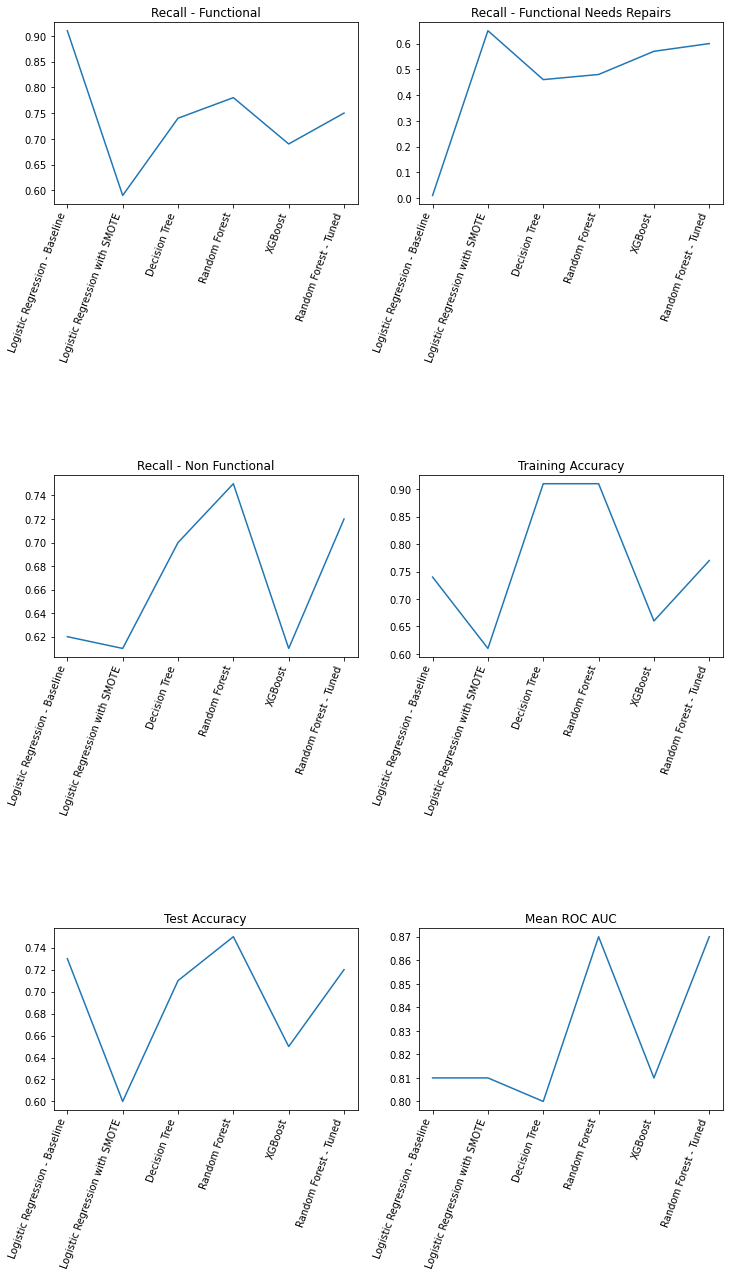

In [188]:
# creating a plot of the model performance metrics
fig, axs = plt.subplots(3, 2, figsize=(12, 20))
plt.subplots_adjust(hspace=1.5)
for ax, col in zip(axs.flatten(), list(model_metrics.columns[1:])):
    ax.plot(model_metrics['model'], model_metrics[col])
    ax.set_xticklabels(labels=model_metrics['model'], rotation=70, ha='right') # 
    ax.set_title(col)

**Plot of Training vs. Test Accuracy**

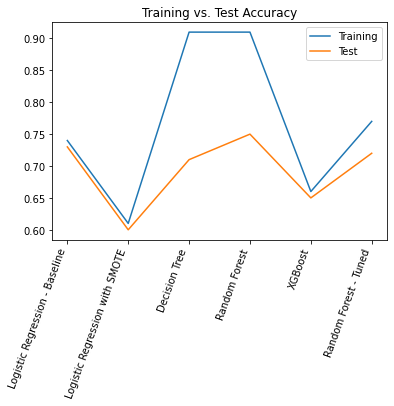

In [202]:
# creating a plot of training and test accuracy for the  models, comparing the accuracy of each model on the training set versus the test set.
plt.plot(model_metrics['model'], model_metrics['Training Accuracy'], label='Training')
plt.plot(model_metrics['model'], model_metrics['Test Accuracy'], label='Test')
plt.xticks(rotation=70, ha='right') 
plt.title('Training vs. Test Accuracy')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.show()

The primary evaluation criteria for the models were the balance of Recall for each class and the test accuracy. The training accuracy was also monitored to ensure that the models were not overfitting, and the Mean AUC was considered as an additional performance measure.

The models were trained in the following order: Baseline, Logistic Regression with SMOTE, Decision Tree, Random Forest, and finally XGBoost. The Random Forest model proved to be the most promising, although it was found to have overfitted the training data.

Since the Random Forest model showed the most promise, its hyperparameters were adjusted to reduce overfitting, balance the Recall of the three classes, and improve accuracy. Ultimately, the best performing model was the tuned Random Forest Classifier. Although it did not have the highest score in every metric, it had the best balanced recall, a high accuracy, and the highest Mean AUC.

**Feature Importance**

Calculated as determined by the best performing random forest classifier

In [190]:
# defining a function named plot_feature_importance that takes a machine learning model model as an input.
def plot_feature_importance(model):
    feat_importance = pd.DataFrame(data = model.feature_importances_, index = train_df_preprocessed.columns)
    feat_importance.columns = ['Importance']
    feat_importance.sort_values(by = 'Importance', ascending = True).tail(15).plot(kind='barh',
                                                                                    figsize=(12,10), 
                                                                                    edgecolor = 'black',
                                                                                    color = 'royalblue')
    plt.title("Feature Importance")
    plt.xlabel('Feature Importance')
    plt.ylabel('Features');

In [191]:
# extracting the feature importances from Random Forest - Tuned  model stored in the variable clf.
feature_importances = clf.best_estimator_[2].feature_importances_

In [192]:
# creating a dataframe that contains the feature importances of the fitted Random Forest - Tuned model stored in the variable clf
cols_to_scale = ['gps_height', 'num_private', 'population', 'construction_year']
cats = clf.best_estimator_[0].transformers_[1][1]['onehot'].get_feature_names()
cols = cols_to_scale + list(cats)
feature_importances_df = pd.DataFrame(feature_importances, index=cols, columns=['importance']).sort_values('importance', ascending=False)

In [193]:
# creating a new column in the dataframe feature_importances_df with the name feature and setting its values to the index of the dataframe
feature_importances_df['feature'] = feature_importances_df.index

In [194]:
# displaying the first 10 rows of the dataframe feature_importances_df to visualize the top 10 most important features according to their importance values stored in the column importance of the dataframe.
feature_importances_df.head(10)

,importance,feature
x7_dry,0.116141,x7_dry
construction_year,0.069012,construction_year
gps_height,0.063841,gps_height
population,0.047016,population
x7_enough,0.040312,x7_enough
x3_other,0.039210,x3_other
x9_other,0.037989,x9_other
x5_never pay,0.032009,x5_never pay
x7_insufficient,0.030132,x7_insufficient
x3_gravity,0.029659,x3_gravity


In [195]:
# creating a new dataframe top_ten that contains only the top 10 rows of the original dataframe feature_importances_df.
top_ten = feature_importances_df[:10]

In [196]:
# sorting the top_ten dataframe based on the values in the importance column. 
top_ten.sort_values(by='importance', inplace=True)


In [197]:
# displaying the top_ten dataframe.
top_ten

,importance,feature
x3_gravity,0.029659,x3_gravity
x7_insufficient,0.030132,x7_insufficient
x5_never pay,0.032009,x5_never pay
x9_other,0.037989,x9_other
x3_other,0.039210,x3_other
x7_enough,0.040312,x7_enough
population,0.047016,population
gps_height,0.063841,gps_height
construction_year,0.069012,construction_year
x7_dry,0.116141,x7_dry


In [198]:
#  assigning the names of the top ten features in the feature_importances_df DataFrame to a new variable called feature_names
feature_names = ['quantity - Dry', 'gps_height', 'construction_year', 'population', 'waterpoint type - other',
                 'extraction_type - other', 'quantity - enough', 'extraction_type - gravity',
                 'quantity - insufficient', 'payment - never pay']

In [199]:
# reversing the order of elements in the list feature_names
feature_names.reverse()

In [200]:
# storing the new list back in the same variable feature_names.
feature_names

['payment - never pay',
 'quantity - insufficient',
 'extraction_type - gravity',
 'quantity - enough',
 'extraction_type - other',
 'waterpoint type - other',
 'population',
 'construction_year',
 'gps_height',
 'quantity - Dry']

<BarContainer object of 10 artists>

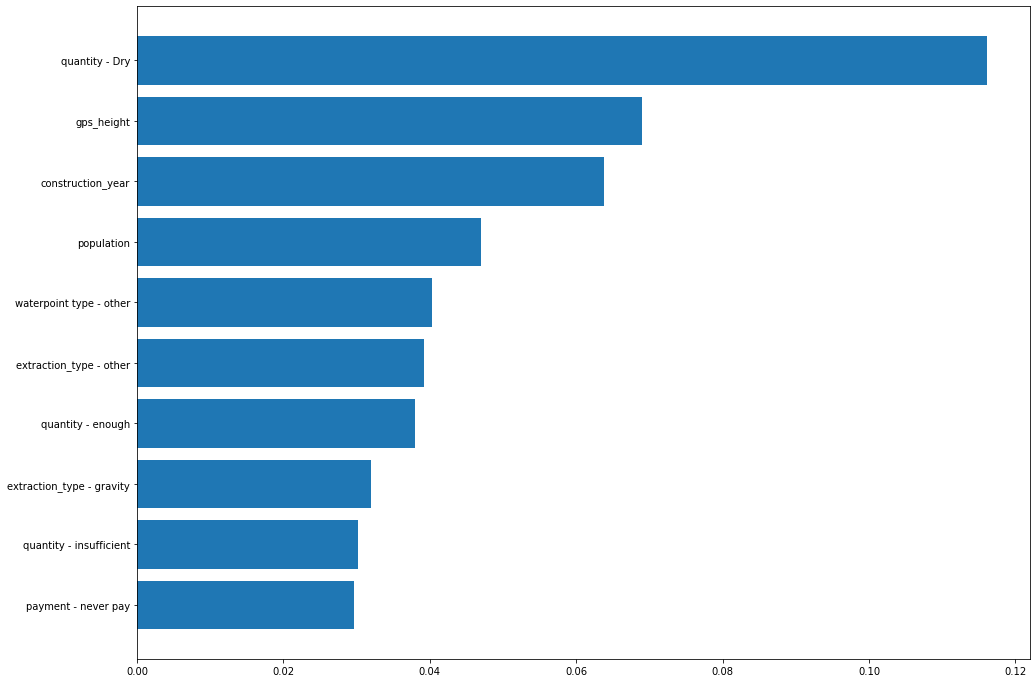

In [201]:
#  visualize the feature importances of our model, with the height of each bar representing the importance of a particular feature.
plt.figure(figsize=(16,12))
plt.barh(feature_names, top_ten['importance'])

The Random forest classifier found that the most important feature for classifying a waterpoint, was whether it was dry. Meaning regardless of the functionality of the waterpoint,there was no water.

**Conclusion.**

* By utilizing a Random Forest Classifier, a 72% accuracy score and recall values of 0.75, 0.60, and 0.72 for the three categories, 'functional', 'functional needs repairs', and 'non-functional' was obtained. The minority class was the category with a recall of 0.60. 
* The Ministry of Water could benefit significantly from this capability to predict water point statuses with a 72% accuracy since it would enable them to prioritize site visits.

**Recommendations**

* I recommend the Ministry of Water utilize the predictive model to develop a strategy for prioritizing waterpoint site visits. The model recommends that waterpoints predicted to be 'functional needs repairs' and 'non functional' be given priority status, while waterpoints predicted to be 'functional' be inspected on a routine basis and to check for any misclassified waterpoints.

* By creating a more effective maintenance program, the Ministry can reduce costs and allocate those savings towards expanding the water infrastructure. 
* Additionally, the accuracy of the model and the Ministry's improved maintenance program can be used to showcase the government's progress and attract international aid.

**Challenging the solution**

* We were able to get an accuracy of 72%, but can we do better and how? This question brings me to future work. In our situation, Our waterpoints fall into one of three categories: functional, functional but in need of repair, or non-functional. 
* We must prioritize correcting any incorrect classifications in the data. For instance, if a non-functional waterpoint is wrongly classified as functional but in need of repair, the maintenance team would simply discover the additional necessary repairs on site. However, if a non-functional waterpoint is erroneously labeled as functional, it would remain in disrepair as it would not receive a visit from the maintenance staff.

**Limitations and next steps to take**

* To improve the model, maintenance records should be integrated to reflect repairs made to the waterpoints, to prevent the same waterpoints from being classified as needing repairs year after year. Historical maintenance records can also be integrated into the model.
* To investigate misclassifications in multiclass classification, it's important to recognize that some misclassifications are more problematic than others. For example, misclassifying a 'Functional Needs Repair' waterpoint as 'non functional' is less problematic than misclassifying it as 'functional', since the former only delays repairs while the latter results in wasted resources. The model's misclassifications can be categorized as correct, inconsequential, or problematic, and instances of problematic misclassifications can be reviewed and used to retrain the model with additional data.
* Additional classifiers can be used to determine which non-functional waterpoints to prioritize for maintenance, rather than simply assuming that all non-functional waterpoints should be visited. For instance, the Random Forest Classifier showed that a dry waterpoint is a strong indicator of non-functionality, and further classifiers could be trained to determine which non-functional waterpoints are worth visiting for repairs. This can help optimize the maintenance operation and reduce unnecessary costs.